In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
df = pd.read_csv('Data.csv', delimiter = ";")
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [5]:
df['age'] = df['age'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    17981 non-null  int64  
 1   name         17981 non-null  object 
 2   nationality  17981 non-null  object 
 3   position     17981 non-null  object 
 4   overall      17981 non-null  int64  
 5   age          17981 non-null  float64
 6   hits         17981 non-null  int64  
 7   potential    17981 non-null  int64  
 8   team         17981 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.2+ MB


In [7]:
df.shape

(17981, 9)

In [8]:
for col in df.select_dtypes(include = object).columns:
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    
    print(f"Column: {col}")
    print(f"Number of unique values: {num_unique}")
    
    if num_unique > 10:
        print("Top 10 Unique values:")    # top 10 values preferred here to prevent clutter in the output.
        top_unique_values = unique_values[ : 10]
        for value in top_unique_values:
            print(value)
    
    else:
        print("Unique values:")
        for value in unique_values:
            print(value)
    print("-----" * 24)

Column: name
Number of unique values: 17701
Top 10 Unique values:
Lionel Messi
Cristiano Ronaldo
Neymar Jr
Virgil van Dijk
Jan Oblak
Kevin De Bruyne
Robert Lewandowski
Eden Hazard
Alisson
Mohamed Salah
------------------------------------------------------------------------------------------------------------------------
Column: nationality
Number of unique values: 162
Top 10 Unique values:
Argentina
Portugal
Brazil
Netherlands
Slovenia
Belgium
Poland
Egypt
Senegal
Germany
------------------------------------------------------------------------------------------------------------------------
Column: position
Number of unique values: 232
Top 10 Unique values:
ST|CF|RW
ST|LW
CAM|LW
CB
GK
CM|CAM
ST
ST|RW
LW
ST|RW|LW
------------------------------------------------------------------------------------------------------------------------
Column: team
Number of unique values: 713
Top 10 Unique values:
FC Barcelona 
Juventus 
Paris Saint-Germain 
Liverpool 
Atlético Madrid 
Manchester City 
FC

In [9]:
df.describe(include = np.number)

,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


In [10]:
df.describe(exclude = np.number)

,name,nationality,position,team
count,17981,17981,17981,17981
unique,17701,162,232,713
top,Paulinho,England,CB,Free Agents
freq,8,1496,2296,211


In [11]:
val = df.isnull().sum()
percentage = 100*df.isnull().sum()/df.shape[0]

missing_df = pd.concat([val, percentage], axis=1)
missing_df.columns = ['value', 'percentage_value']
missing_df.sort_values(by ='percentage_value', ascending=False)

,value,percentage_value
player_id,0,0.0
name,0,0.0
nationality,0,0.0
position,0,0.0
overall,0,0.0
age,0,0.0
hits,0,0.0
potential,0,0.0
team,0,0.0


- No missing values in the dataset.

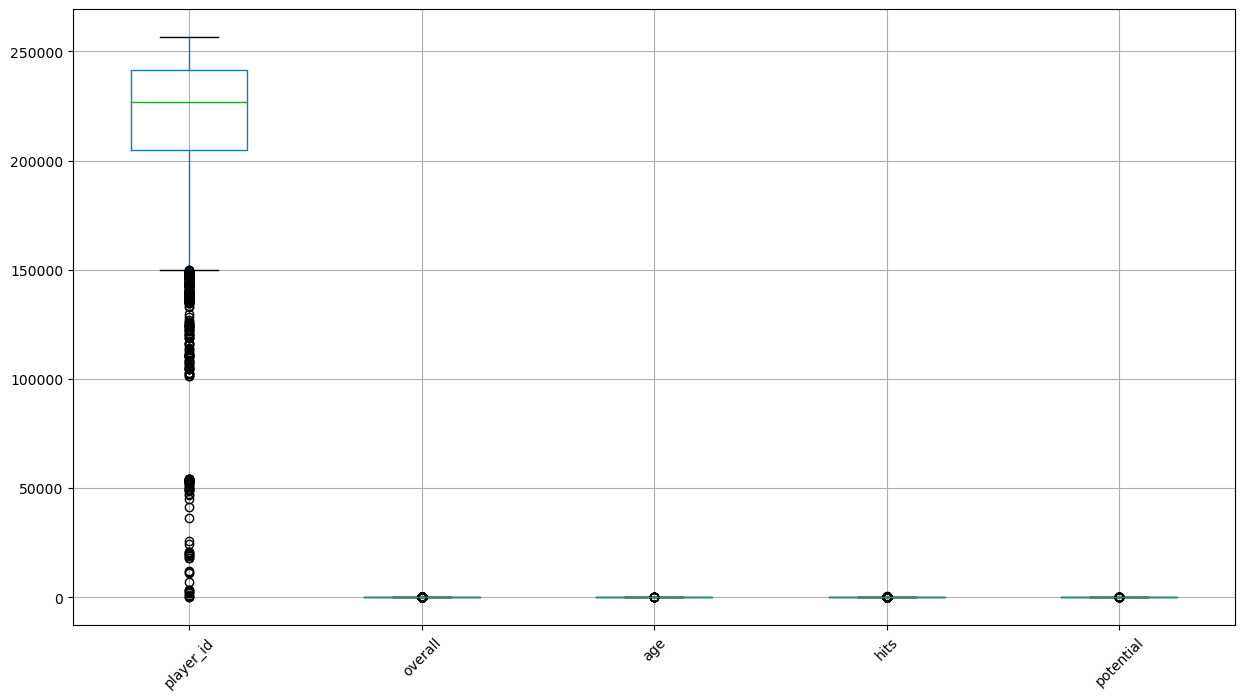

In [12]:
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

### Reason for Removing **`player_id`** Column:

The player_id column serves as a unique identifier for each player in the dataset. However, upon careful analysis, it has been determined that the player_id does not contribute meaningful insights to our analysis objectives, which are centered around understanding player attributes, performance, and trends within the context of FIFA 21. The column does not provide any relevant information regarding player ratings, potential, age, positions, or team affiliations, which are the key factors we are focusing on.

By removing the player_id column, we aim to streamline our analysis and reduce unnecessary complexity in the dataset. This will lead to improved data processing efficiency and a clearer focus on the attributes that are directly relevant to our research questions. Removing this column also aligns with the principle of keeping the dataset concise and relevant to our analysis goals.

It's important to note that this decision has been made after careful consideration of the role of the player_id column within the context of our analysis objectives. The removal of this column does not impact the integrity of the dataset or compromise our ability to derive meaningful insights from the data. This documentation ensures transparency and clarity for both present and future users of the dataset, facilitating a more effective analysis process.
As there are no visible outliers compared to player_id present in any other column, we proceed to removing the player_id column.

In [13]:
df.drop(columns = 'player_id', inplace= True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         17981 non-null  object 
 1   nationality  17981 non-null  object 
 2   position     17981 non-null  object 
 3   overall      17981 non-null  int64  
 4   age          17981 non-null  float64
 5   hits         17981 non-null  int64  
 6   potential    17981 non-null  int64  
 7   team         17981 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB


In [15]:
df.head()


,name,nationality,position,overall,age,hits,potential,team
0,Lionel Messi,Argentina,ST|CF|RW,94,33.0,299,94,FC Barcelona
1,Cristiano Ronaldo,Portugal,ST|LW,93,35.0,276,93,Juventus
2,Neymar Jr,Brazil,CAM|LW,92,28.0,186,92,Paris Saint-Germain
3,Virgil van Dijk,Netherlands,CB,91,29.0,127,92,Liverpool
4,Jan Oblak,Slovenia,GK,91,27.0,47,93,Atlético Madrid


In [16]:
df.tail()

,name,nationality,position,overall,age,hits,potential,team
17976,Jaime Ortíz,Ecuador,ST,56,21.0,0,64,Sociedad Deportiva Aucas
17977,Michael Carcelén,Ecuador,CM,56,23.0,0,64,Club Deportivo El Nacional
17978,Davide Luzi,Venezuela,ST,56,18.0,1,68,Zamora Fútbol Club
17979,Sergio Sulbarán,Venezuela,RW,56,22.0,0,62,Zamora Fútbol Club
17980,Luis Peña,Venezuela,CM,56,18.0,0,69,Zamora Fútbol Club


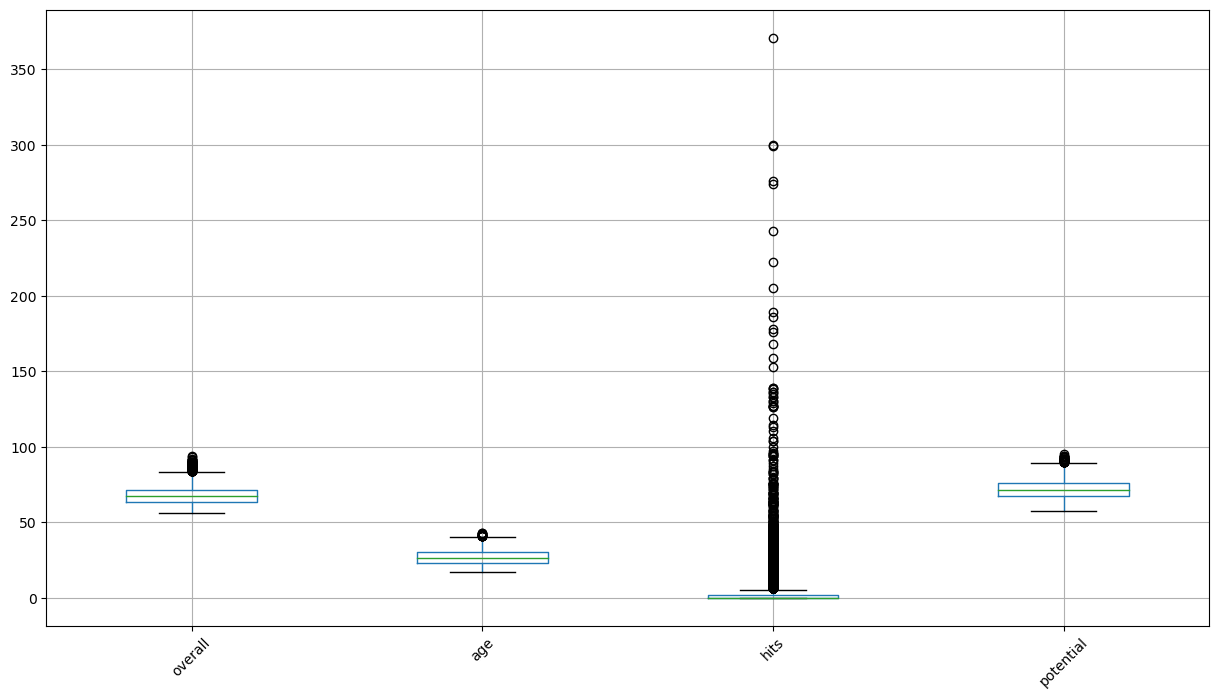

In [17]:
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

### Reason for Keeping Outliers in the **`hits`** Column:

The 'hits' column in the FIFA 21 dataset represents the number of attempts a player made to score a goal. This metric provides essential insights into a player's offensive performance and goal-scoring attempts during matches. Upon closer examination, it has been observed that there are potential outliers with values above the upper whisker in the 'hits' column.

**Significance of 'hits' Column:**
The 'hits' column directly contributes to our understanding of player behavior and effectiveness on the field. Each outlier in this column signifies instances where a player has made an exceptional number of attempts to score goals, potentially highlighting standout players who are actively engaged in goal-scoring efforts. These outliers could represent prolific goal scorers or players who actively contribute to their team's offensive strategies.

**Analysis and Interpretation:**
Removing outliers from the 'hits' column would risk discarding crucial information that can significantly impact our analysis and interpretation of player performance. By preserving these outliers, we enable a more comprehensive evaluation of player effectiveness and contributions to their teams' offensive strategies. Analyzing the distribution and characteristics of these outliers can lead to insights into player performance variations, team dynamics, and even strategies employed by different players.

**Enhancing Insights:**
Outliers often serve as focal points for analysis, drawing attention to exceptional cases that warrant investigation. By keeping outliers in the 'hits' column, we allow for a more nuanced exploration of player behavior and potential factors that contribute to their goal-scoring attempts. This approach aligns with our objective of obtaining a holistic view of player performance and the diverse strategies used by players to impact matches.

In conclusion, the presence of outliers in the 'hits' column enriches our analysis by capturing unique player behaviors and performance aspects that might not be apparent through central tendencies alone. Retaining these outliers ensures that we capture the full range of player contributions and provides a more complete understanding of player performance in the context of the game.

----------------------------------

## Univariate Analysis.

In our exploratory data analysis (EDA), we conducted univariate analysis on the 'overall' and 'potential' columns, Age Distribution, Position and Nationality columns, and Team Representation of the FIFA 21 players dataset. Here are the key observations from the analysis:

### Player Overall Ratings and Potential:
#### Density Plots (KDE Plots)


We used KDE plots (kernel density estimation) from Seaborn for smooth visualizations of the data distribution. KDE plots are particularly suitable for continuous data like player ratings and potential.

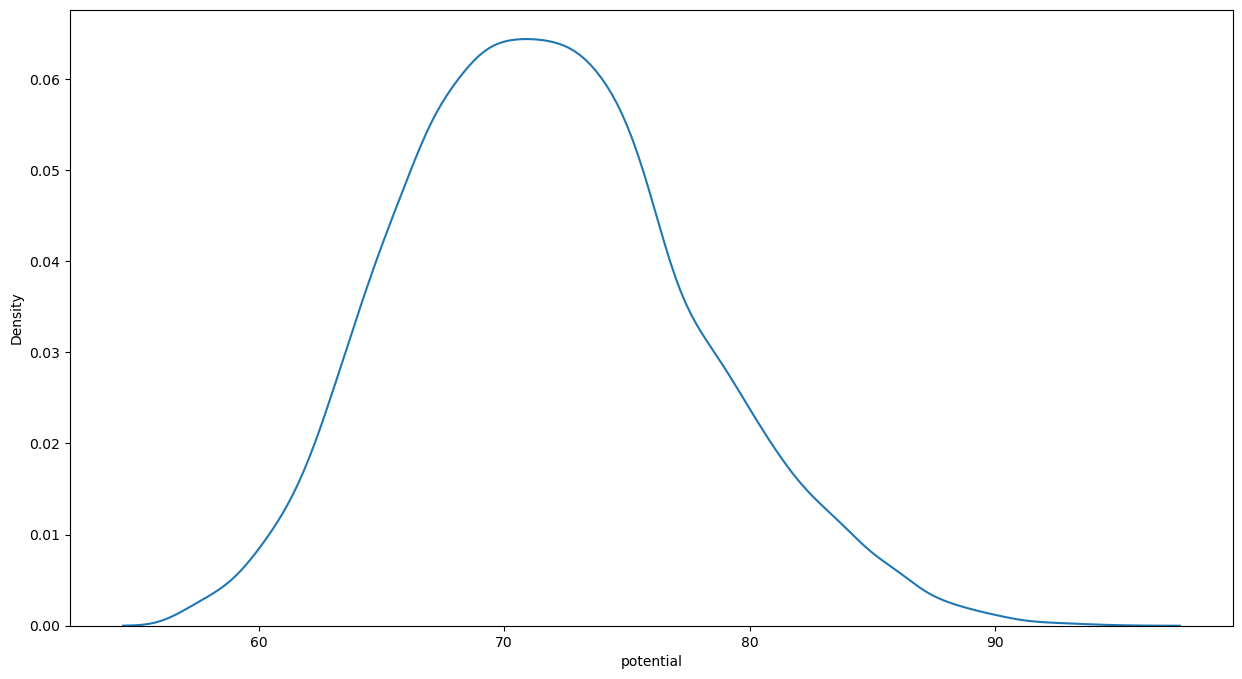

In [18]:
sns.kdeplot(data = df, x = 'potential')
plt.show()

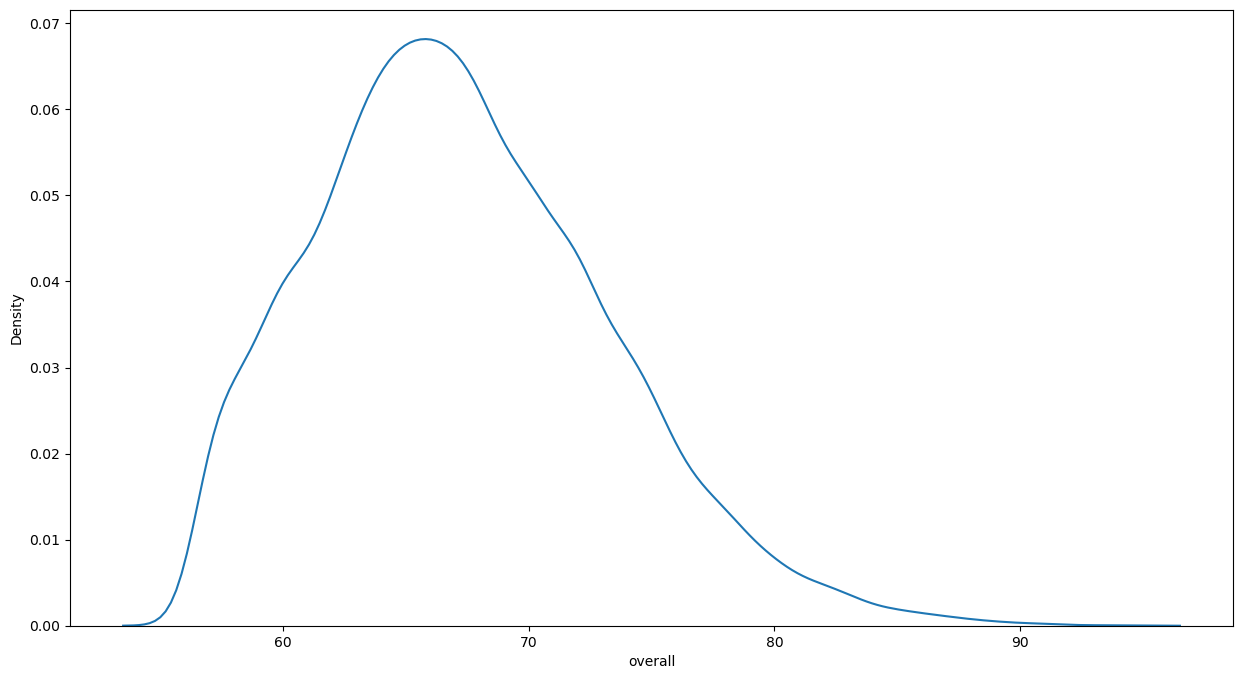

In [19]:
sns.kdeplot(data = df, x = 'overall')
plt.show()

#### Distribution Observations

- **Overall Ratings (Density Plot):** The density plot for player overall ratings shows a slight left-skewed distribution, indicating that the majority of players have ratings skewed towards the higher end.
- **Potential (Density Plot):** The potential density plot displays a near-normal distribution, suggesting balanced spread of player growth potential.

In [20]:
df.describe().drop(columns = ['age','hits'])

,overall,potential
count,17981.000000,17981.000000
mean,67.274345,71.738057
std,5.924392,5.961968
min,56.000000,57.000000
25%,63.000000,67.000000
50%,67.000000,71.000000
75%,71.000000,76.000000
max,94.000000,95.000000


#### Summary Statistics

- **Mean Overall Rating:** The mean overall rating is approximately 67.27, reflecting the average rating across all players.
- **Mean Potential:** The mean potential is around 71.74, representing the average player growth potential.
- **Standard Deviations (std):** Similar standard deviations for both attributes suggest comparable variability in player ratings and potential.

#### Min and Max Values

The range between the minimum and maximum values of 'overall' and 'potential' columns indicates the span of possible ratings and potential values. Notably, the highest overall rating recorded is 94, and the highest potential is 95.

These findings lay the foundation for deeper exploration of player performance and potential growth within the context of FIFA 21.

### Age Distribution.

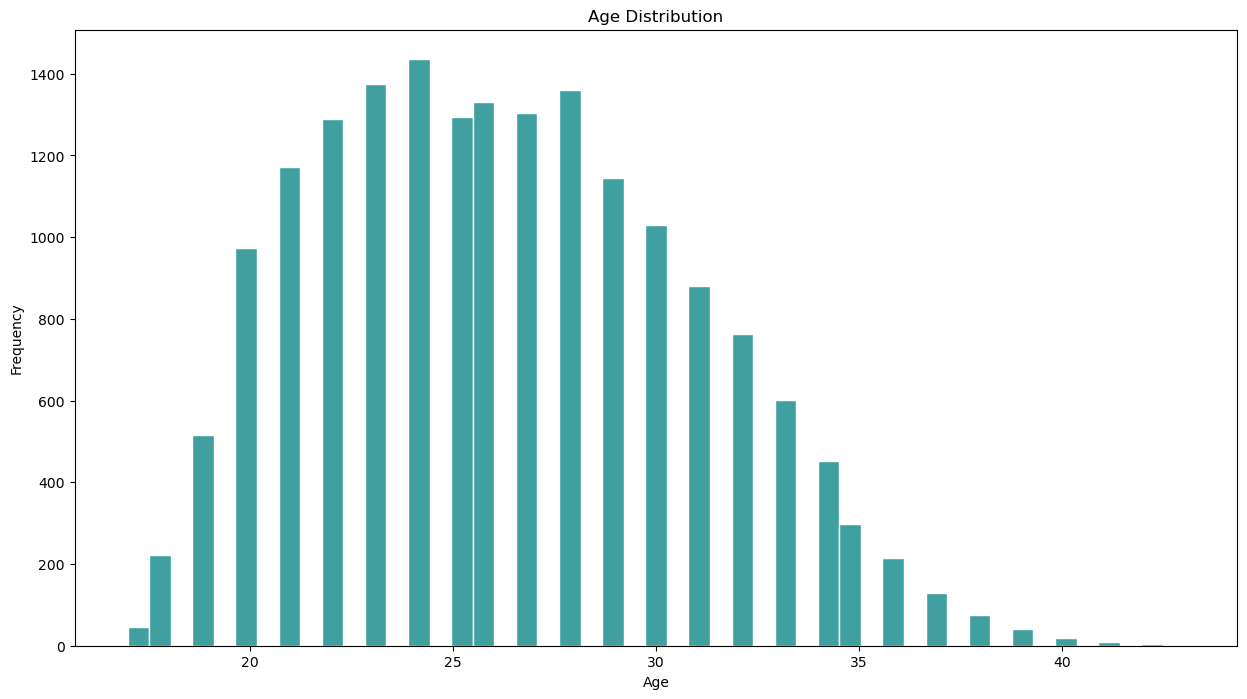

In [21]:
sns.histplot(x=df['age'], bins='auto', kde=False, color='teal', edgecolor='white')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

- **Histogram (histplot):** A visually appealing histogram was generated using Seaborn's histplot, showcasing the player age distribution with teal coloring and white edgecolor.
- **Distribution Characteristics:** The histogram's shape indicated a predominant age range of 20 to 30 years. 

In [22]:
data = df[['name', 'age']]
df1 = pd.DataFrame(data)

dfs = []

for age in df1['age'].unique():
    player_count = df1[df1['age'] == age].shape[0]
    age_df = pd.DataFrame({'Age': [age], 'Player Count': [player_count]})
    dfs.append(age_df)

age_player_count_df = pd.concat(dfs, ignore_index=True)

age_player_count_df

,Age,Player Count
0,33.0,601
1,35.0,298
2,28.0,1360
3,29.0,1146
4,27.0,1303
5,31.0,880
6,32.0,764
7,21.0,1172
8,30.0,1031
9,34.0,453


In [23]:
df.describe().drop(columns = ['overall', 'hits', 'potential'])

,age
count,17981.000000
mean,26.311440
std,4.556077
min,17.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,43.000000


**Summary Statistics:** 

- **Range and Quartiles:** The mean age was about 26.31 years, with a standard deviation of approximately 4.56 years. The age range spanned 17 to 43 years, with the 25th percentile at 23 and the 75th percentile at 30. The median age stood at 26 years. 
**Insightful Observations:** Notable observations included the youngest player at 17 years and the oldest at 43 years. Most players clustered between 20 and 30 years.

This analysis contributes to understanding the age demographics of FIFA 21 players, aiding in strategic gameplay and player evaluation.

---------------------------------------

### Player Positions and Nationalities:

In [24]:
df[['nationality', 'position']].nunique()   # number of unique nationalities and positions

nationality    162
position       232
dtype: int64

**Number of Unique Nationalities and Positions:**
- The dataset contains 162 unique nationalities and 232 distinct player positions, showcasing the game's global diversity.

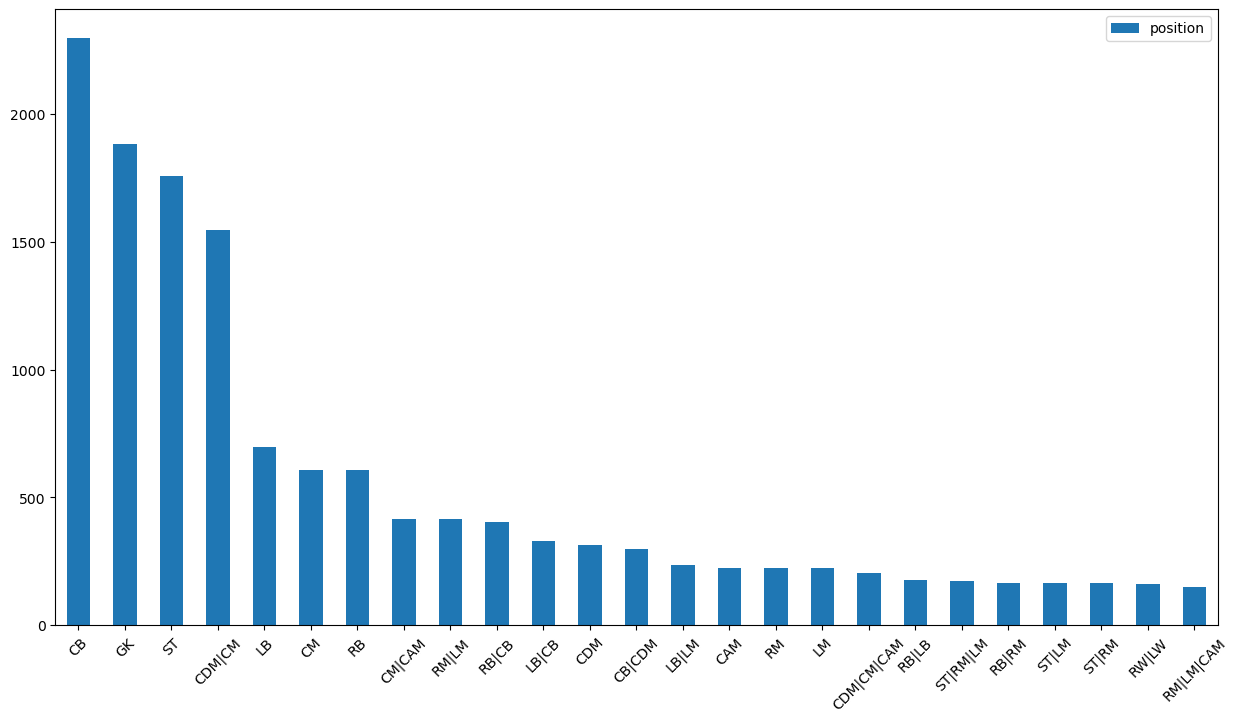

In [25]:
df['position'].value_counts().to_frame()[:25].plot(kind = 'bar') # top 25 positions
plt.xticks(rotation = 45)
plt.show()

**Top 25 Player Positions:**
- The most frequent positions include CB (Center Back) with 2296 players, GK (Goalkeeper) with 1884, and ST (Striker) with 1757.


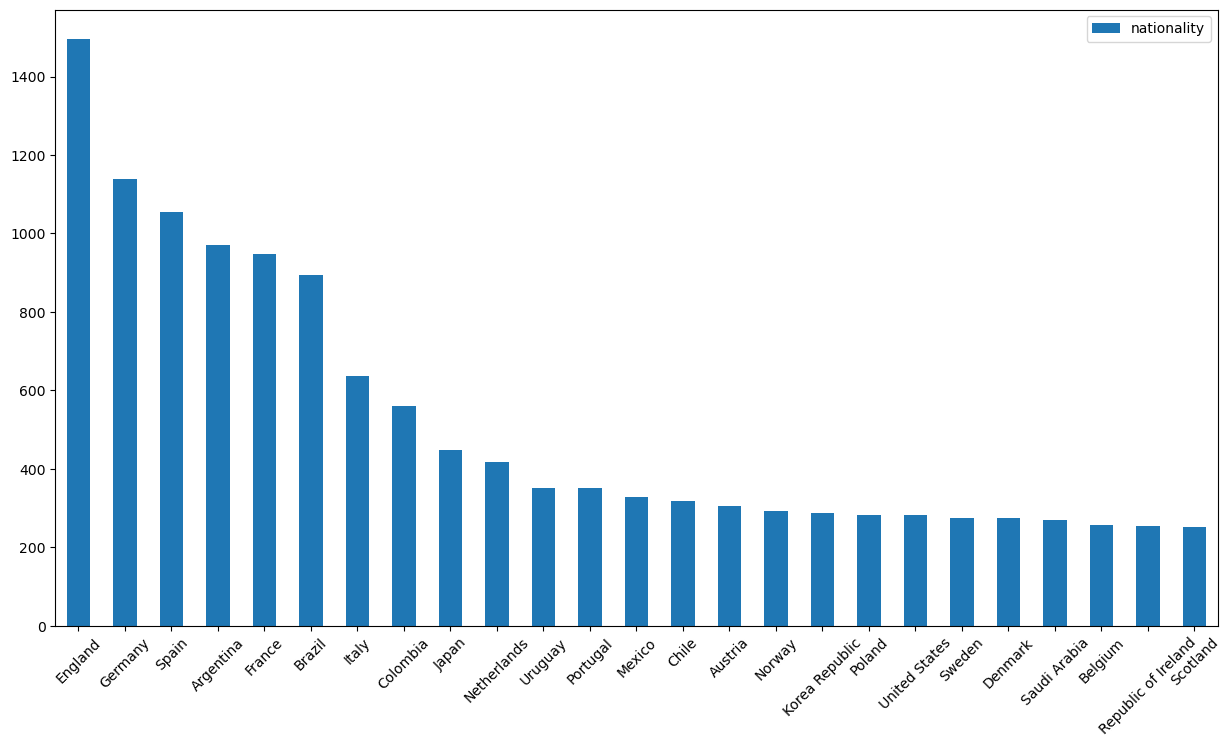

In [26]:
df['nationality'].value_counts().to_frame()[:25].plot(kind = 'bar')    # top 25 countries
plt.xticks(rotation = 45)
plt.show()                     

**Top 25 Nationalities:**
- The most represented nationalities are England (1496), Germany (1138), Spain (1055), Argentina (970), and France (948).

In [27]:
df[['nationality', 'position']].value_counts().to_frame()[:1]   # most common nationality and position

,,0
nationality,position,
England,CB,209


**Most Common Nationality and Position:**
- The combination of England and CB (Center Back) is the most prevalent, with 209 players.

This analysis provides insights into the distribution of players across positions and nationalities in FIFA 21. It offers a glimpse into the virtual football landscape, highlighting popular roles and the global player base. These findings set the stage for deeper exploration of player demographics and preferences.

--------------------------------------

### Team Representation:

In [28]:
df['team'].unique()

array(['FC Barcelona ', 'Juventus ', 'Paris Saint-Germain ', 'Liverpool ',
       'Atlético Madrid ', 'Manchester City ', 'FC Bayern München ',
       'Real Madrid ', 'Chelsea ', 'Tottenham Hotspur ', 'Napoli ',
       'Manchester United ', 'Arsenal ', 'Inter ', 'Lazio ',
       'Valencia CF ', 'Borussia Dortmund ', 'RB Leipzig ',
       'Leicester City ', 'Ajax ', 'Borussia Mönchengladbach ',
       'Atalanta ', 'Milan ', 'Real Betis ', 'SL Benfica ', 'RC Celta ',
       'Guangzhou Evergrande Taobao FC ', 'Bayer 04 Leverkusen ',
       'FC Porto ', 'Olympique Lyonnais ', 'AS Monaco Football Club SA ',
       'Shanghai SIPG FC ', 'Roma ', 'Sevilla FC ', 'Cagliari ',
       'Torino ', 'Wolverhampton Wanderers ', 'Grêmio ',
       'Atlético Mineiro ', 'Real Sociedad ', 'Getafe CF ',
       'TSG 1899 Hoffenheim ', 'Eintracht Frankfurt ',
       'Medipol Basaksehir FK ', 'Olympique de Marseille ', 'Everton ',
       'Crystal Palace ', 'VfL Wolfsburg ', 'Athletic Club ',
       'Fenerbahçe 

**Team Diversity:** The dataset encompasses a wide range of team sizes, with some traditional football powerhouses having similar player counts to lesser-known teams.

**Unique Category:** 
- **`Free Agents`**, while not a traditional team, play a vital role in the dataset. They offer insights into player potential, positions, hits and overall ratings making them significant for future team assignments.

In [29]:
df['team'].nunique()

713

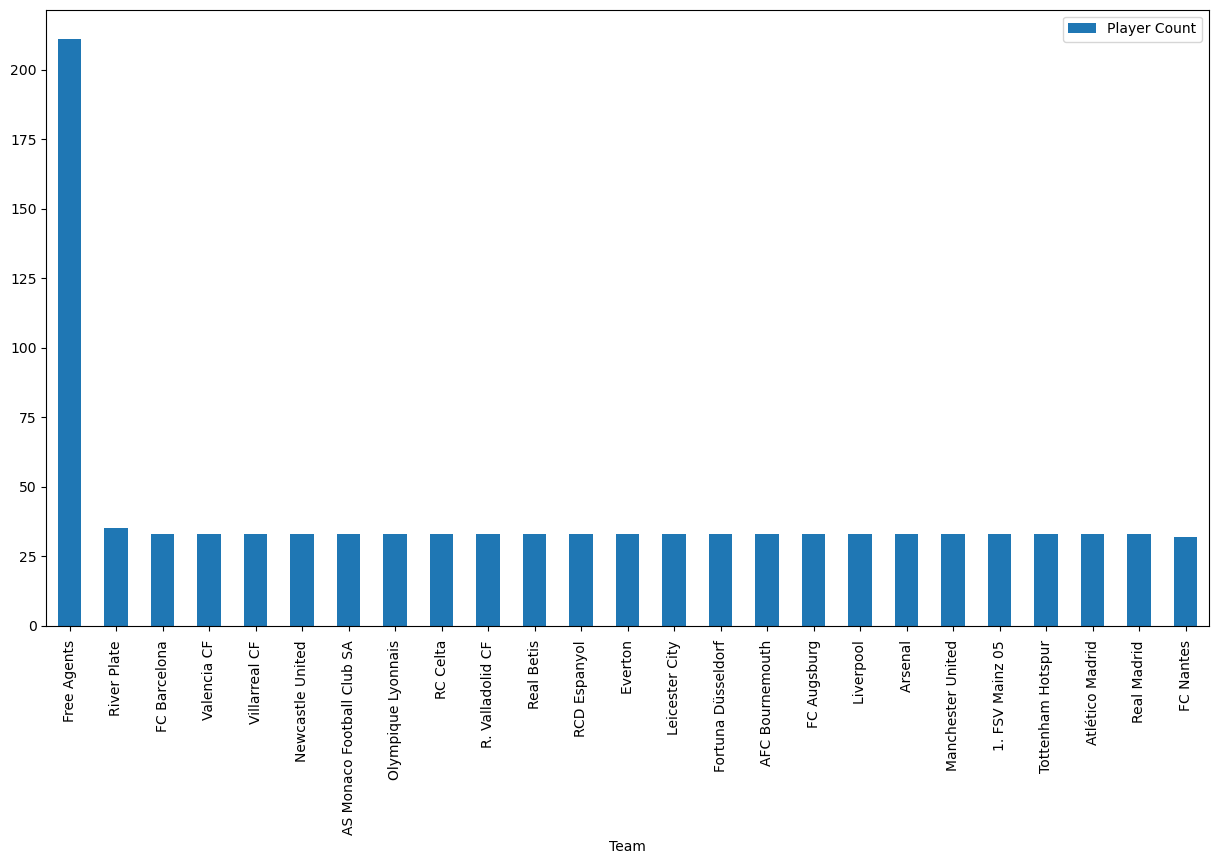

In [30]:
data = df['team']
df1 = pd.DataFrame(data)

dfs = []

for team in df1['team'].unique():
    player_count = df1[df1['team'] == team].shape[0]
    team_df = pd.DataFrame({'Team': [team], 'Player Count': [player_count]})
    dfs.append(team_df)

team_player_count_df = pd.concat(dfs, ignore_index=True)
team_player_count_df.sort_values(by = "Player Count", ascending = False, inplace = True)
team_player_count_df.head(25) # top 25 teams
team_player_count_df[:25].plot(kind = 'bar', x = 'Team') # top 25 teams with player count
plt.show()  

**Top Teams:** 
- The top 25 teams with the highest player counts were identified. Notably, `Free Agents` had the highest player count of 211. However, it's important to note that "Free Agents" are players not currently contracted with any team, representing a unique category.

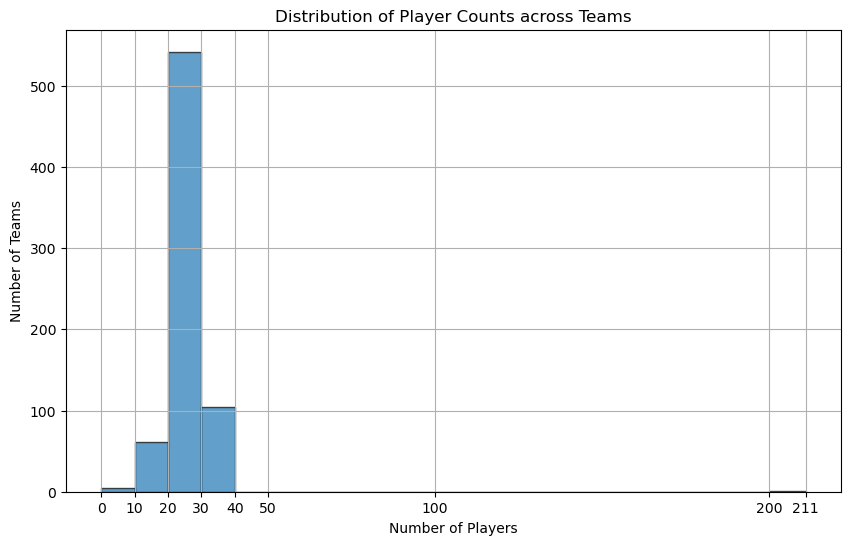

In [31]:
# Calculate player counts per team
team_player_counts = df['team'].value_counts()

# Create bins for player counts
bins = [0, 10, 20, 30, 40, 50, 100, 200, max(team_player_counts)]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(team_player_counts, bins=bins, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Players')
plt.ylabel('Number of Teams')
plt.title('Distribution of Player Counts across Teams')
plt.xticks(bins)
plt.grid(True)
plt.show()

**Distribution:** 
- A histogram and bar plot were created to visualize the distribution of player counts across teams. The histogram revealed that most teams had player counts ranging from 10 to 40, with a few outliers having significantly higher counts.

In [32]:
team_player_count_df.describe()

,Player Count
count,713.000000
mean,25.218794
std,8.215485
min,1.000000
25%,22.000000
50%,25.000000
75%,28.000000
max,211.000000


**Summary Statistics:** 
- Summary statistics were calculated for player counts per team. The mean player count was approximately 25, with a standard deviation of around 8. The minimum and maximum player counts were 1 and 211, respectively.

In [33]:
team_player_count_df.tail(7)

,Team,Player Count
348,Club Unión Magdalena S.A,10
395,Tianjin Tianhai FC,10
707,Cork City,9
230,Beijing Renhe FC,9
709,Waterford FC,8
711,Finn Harps,7
712,UCD AFC,1


**Lowest Player Count Team:** 

- The team with the lowest player count is "UCD AFC" with just 1 player. This information becomes more interesting when considering the official rules of football matches. A match is played by two teams, each with a maximum of eleven players; one must be the goalkeeper. A match may not start or continue if either team has fewer than seven players. If a team starts a match with fewer than eleven players, only the players and substitutes named in the starting line-up may take part in the match upon their arrival.

In conclusion, our analysis highlighted the diverse distribution of player counts across football teams, shedding light on both traditional teams and unique categories like "Free Agents." Understanding these insights will be valuable for further analyses.

--------------------------------

## Bivariate Analysis:


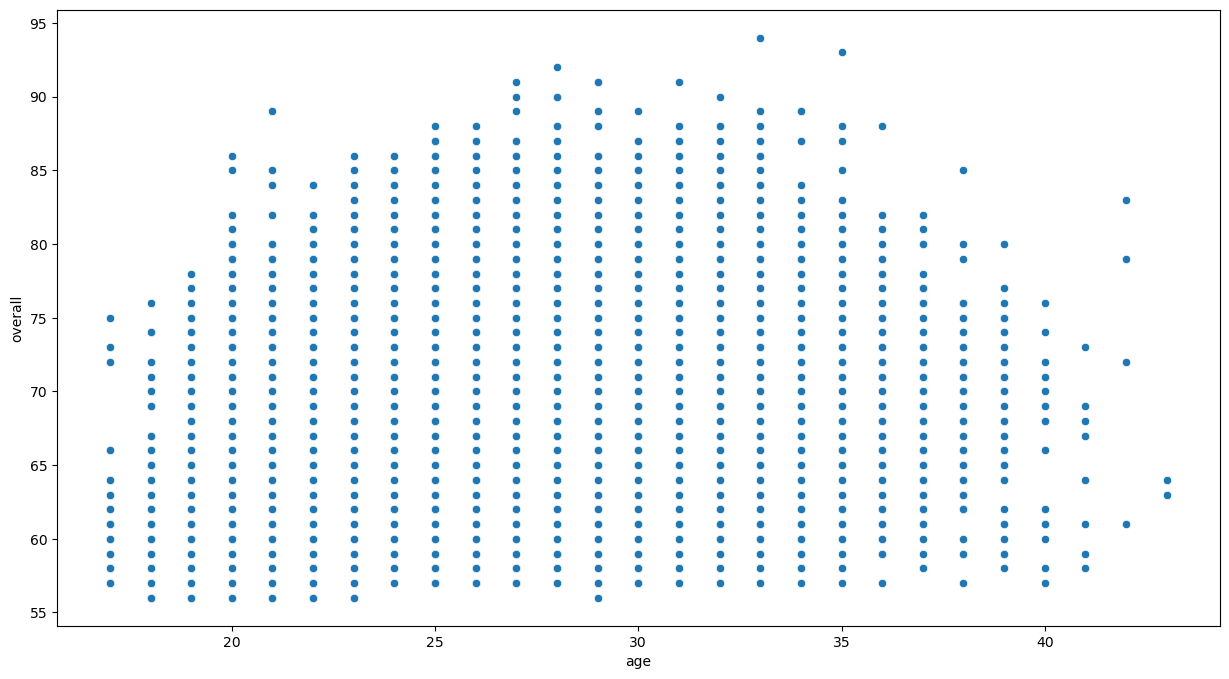

In [34]:
sns.scatterplot(data = df, x = 'age', y = 'overall')
plt.show()

The scatter plot above illustrates the relationship between player age and their overall ratings. Each point on the plot represents a player in the dataset, with the x-coordinate indicating the player's age and the y-coordinate representing their overall rating.

#### Observations:

- The scatter plot reveals a scattered distribution of points, indicating a diverse range of player ages and overall ratings.
- There is a general trend of increasing overall ratings with age. As players get older, they tend to achieve higher overall ratings. This observation aligns with the concept that experience and skill development over time contribute to higher ratings.
- Despite the trend, there are notable exceptions where players of similar ages exhibit varying overall ratings. This suggests that age is not the sole determinant of a player's rating, and other factors, such as performance and position, also play a role.
- It's important to recognize that the relationship is not perfectly linear, as there is variability in ratings for players of the same age.


#### Limitations and Considerations:

While the scatter plot provides valuable insights, it's essential to consider potential limitations:
- The analysis does not establish a causal relationship between age and overall ratings; other factors may contribute to players' ratings.
- The dataset might have selection bias, as it only includes players who have been rated and evaluated.
- Other player attributes, such as position, playing style, and recent performance, may interact with age to influence overall ratings.

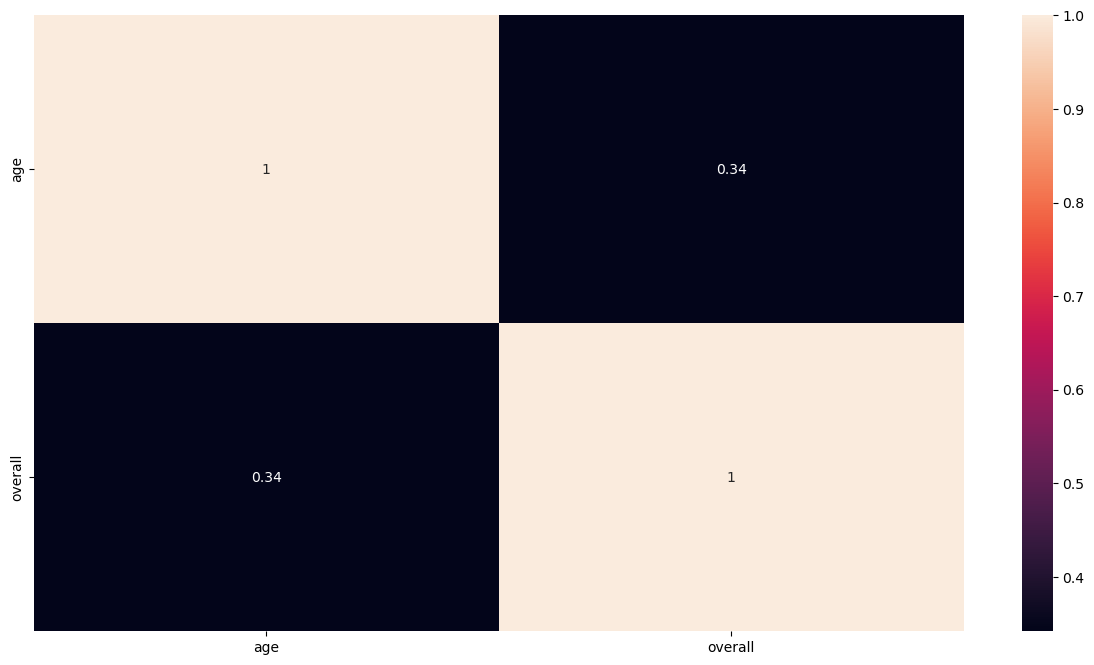

In [35]:
sns.heatmap(df[['age', 'overall']].corr(), annot = True)
plt.show()

In [36]:
df['age'].corr(df['overall'])

0.3419950859163446

#### Correlation Coefficient:

We also computed the Pearson correlation coefficient, which measures the strength and direction of a linear relationship between age and overall ratings. The obtained correlation coefficient is approximately 0.342. This positive correlation value indicates a moderate positive relationship between player age and their overall ratings. However, it's crucial to note that correlation doesn't establish causation, and there might be other contributing factors influencing the overall ratings of players.

In [37]:
# Displaying Age and mean of overall column for every age group, min and max can be retrieved by changing the aggregate function

df.groupby(by = 'age')['overall'].mean().to_frame()

,overall
age,
17.0,60.688889
18.0,60.937220
19.0,61.411650
20.0,63.508214
21.0,63.575085
22.0,65.213344
23.0,66.061047
24.0,67.194290
25.0,67.544049


To gain insights into the relationship between age and overall ratings, we analyzed the maximum, minimum, and mean overall ratings for each age group. Our observations include:

- The range of overall ratings spans from a minimum of 56 to a maximum of 94.
- Older players tend to achieve higher maximum overall ratings, indicating that some players reach their peak performance later in their careers.
- Similarly, the minimum overall ratings increase with age, implying that older players, on average, have better minimum ratings.
- The mean overall ratings exhibit a consistent rise as players' age advances, suggesting a positive correlation between age and overall ratings.

In [38]:
df.describe().drop(columns = ['potential','hits'])

,overall,age
count,17981.000000,17981.000000
mean,67.274345,26.311440
std,5.924392,4.556077
min,56.000000,17.000000
25%,63.000000,23.000000
50%,67.000000,26.000000
75%,71.000000,30.000000
max,94.000000,43.000000



#### Conclusion:

In conclusion, the analysis reveals a moderate positive correlation between player age and their overall ratings. Older players generally exhibit higher overall ratings, implying that experience and skill may play a role in determining a player's rating. Nonetheless, it's essential to account for other relevant attributes and potential confounding factors. Further investigations could delve into how different player attributes impact overall ratings across various age groups.

----------------------------------

#### Position vs. Overall Ratings:

In this section, we explored the relationship between player positions and their corresponding overall ratings. By analyzing the distribution of ratings across different positions, we aimed to uncover how player positions impact their performance ratings.


In [39]:
df['position'].unique()
df['position'].nunique()
position_stats = df.groupby(by = 'position')['overall'].agg(['mean', 'median', 'std','max','min', 'count']).reset_index()
position_stats.sort_values(by = 'count',ascending = False, inplace = True)
position_stats.reset_index(drop = True, inplace = True)

top_positions = position_stats.head(25)
top_positions

,position,mean,median,std,max,min,count
0,CB,67.776132,67.0,5.868602,91,56,2296
1,GK,66.565817,66.0,6.295808,91,56,1884
2,ST,67.310188,67.0,6.151557,91,56,1757
3,CDM|CM,68.440492,68.0,5.683282,89,57,1546
4,LB,66.152518,66.0,5.616186,86,56,695
5,CM,65.299342,64.0,6.435271,89,56,608
6,RB,66.617162,66.0,5.505096,85,56,606
7,CM|CAM,67.780723,67.0,6.301416,91,56,415
8,RM|LM,67.323671,67.0,5.014417,83,57,414
9,RB|CB,66.495050,66.0,5.333770,82,57,404


#### Summary of Position Statistics:

We began by calculating key summary statistics for each player position, focusing on attributes like mean, median, standard deviation, maximum, minimum, and count of players. This provided valuable insights into the distribution and variability of overall ratings within each position.

Here are some key takeaways from the position statistics:

- **Position Popularity**: The top 25 player positions based on player count include positions like CB (Center Back), GK (Goalkeeper), ST (Striker), CDM|CM (Central Defensive Midfielder/Center Midfielder), and more. This highlights the diversity of roles and responsibilities in the football field.

- **Average Overall Rating**: Positions such as CDM|CM and RW|LW show higher average overall ratings, indicating that players in these roles tend to have relatively better performance ratings. In contrast, positions like LB (Left Back) and CM (Center Midfielder) have slightly lower average ratings.

- **Rating Spread**: The standard deviation values provide insights into the spread of ratings within each position. Higher standard deviation suggests greater variability in ratings, indicating a broader range of player skills within those positions.

- **Maximum and Minimum Ratings**: The maximum and minimum ratings for each position highlight the range of player quality within that role. For instance, CDM|CM positions show a maximum rating of 91 and a minimum of 57, indicating a significant spread in player abilities.

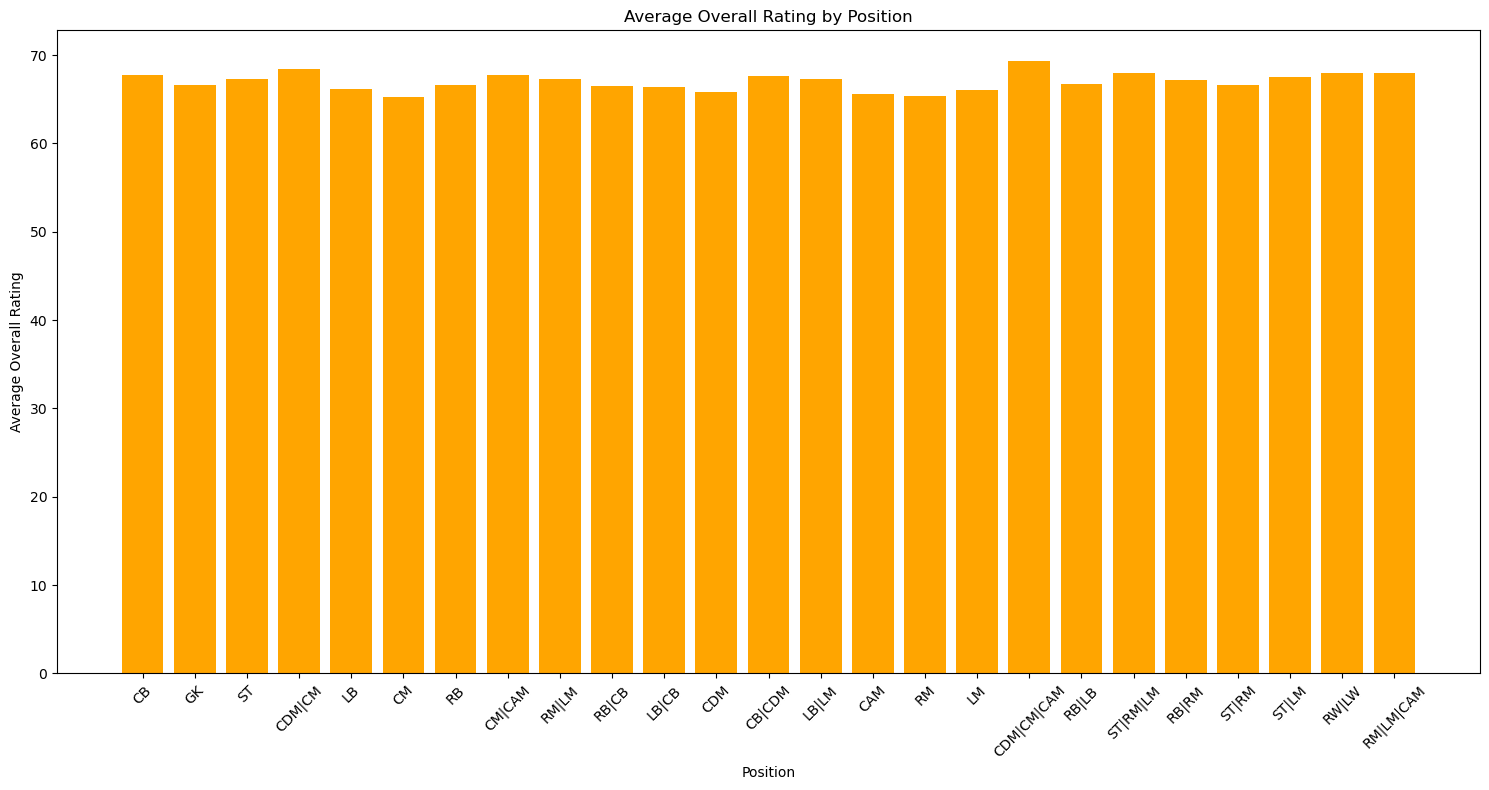

In [40]:
plt.bar(top_positions['position'], top_positions['mean'], color = 'orange')
plt.xlabel('Position')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating by Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- **Bar Plot:** This plot provided an overview of the average overall ratings for each position. It illustrated the distribution of average ratings across positions, offering insights into high and low-performance positions.

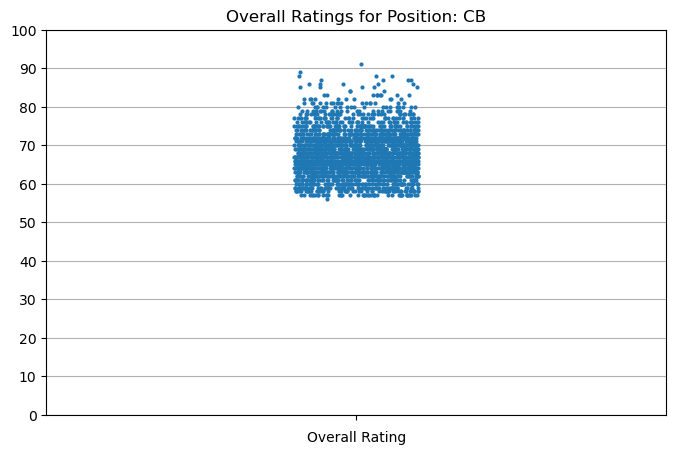

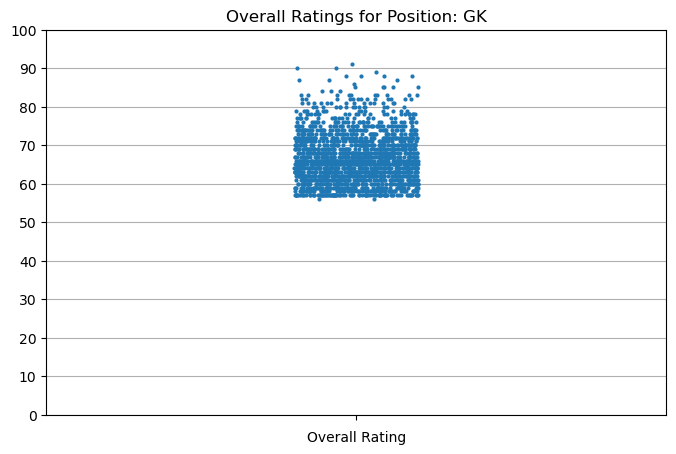

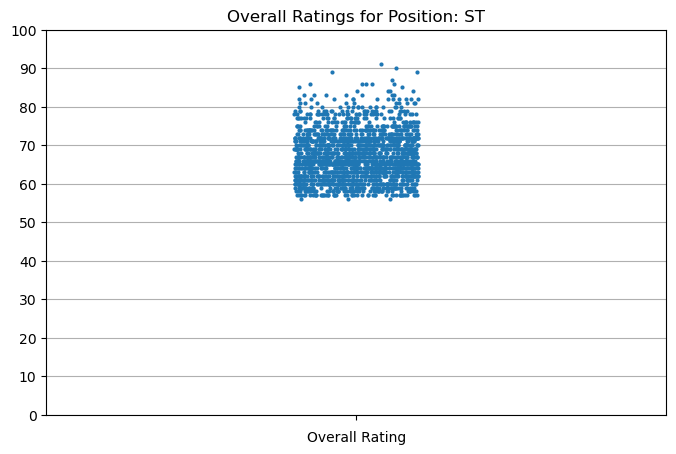

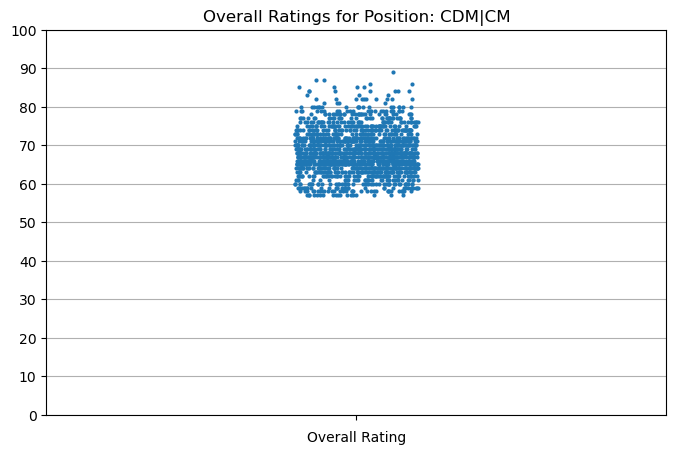

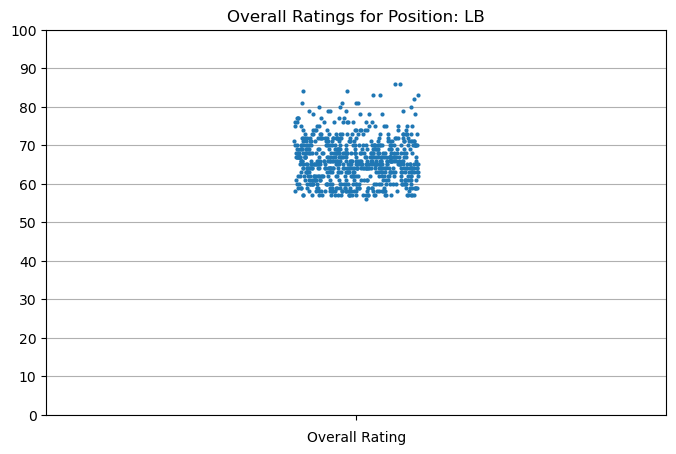

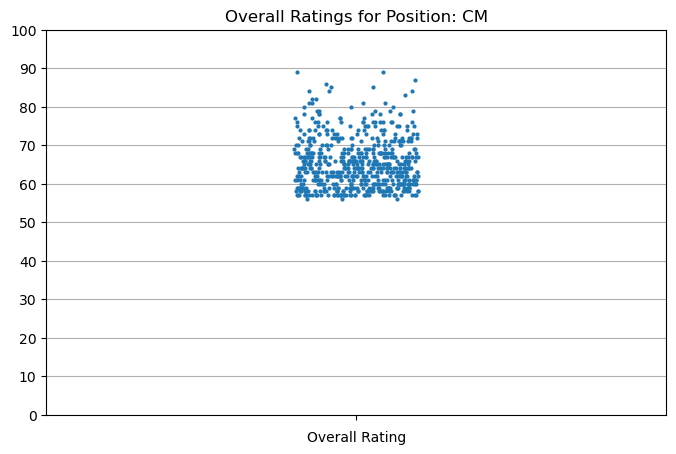

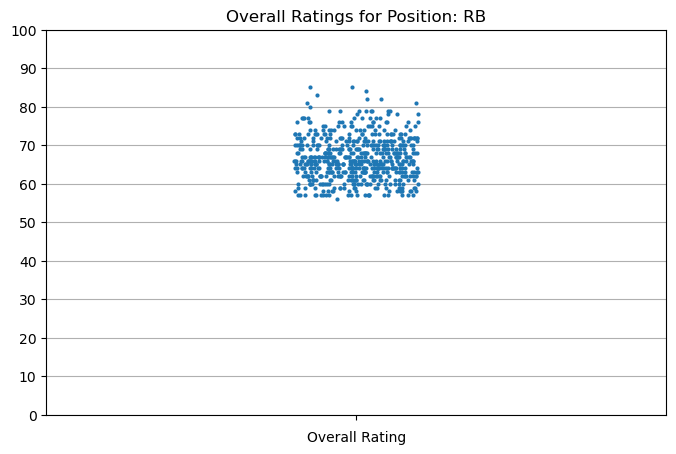

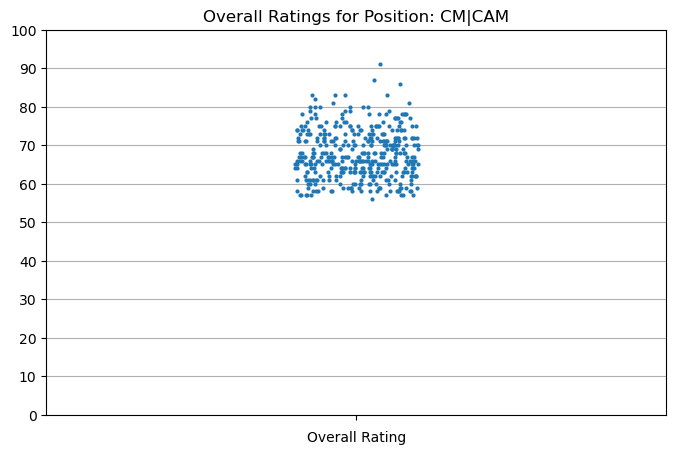

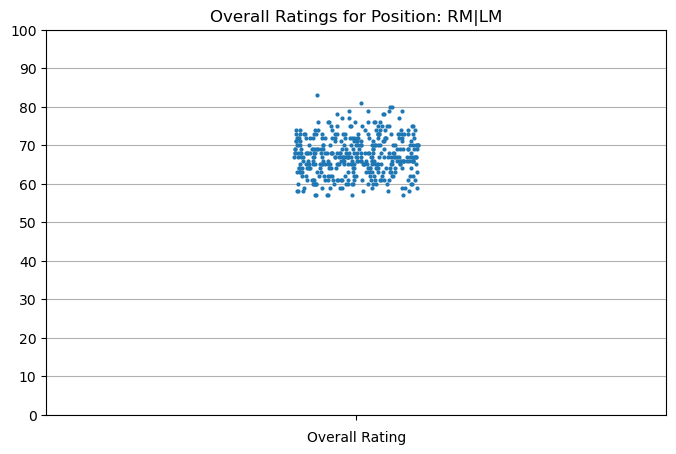

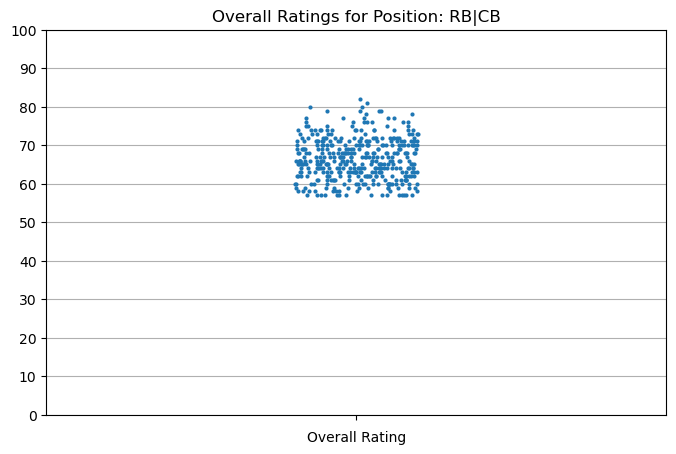

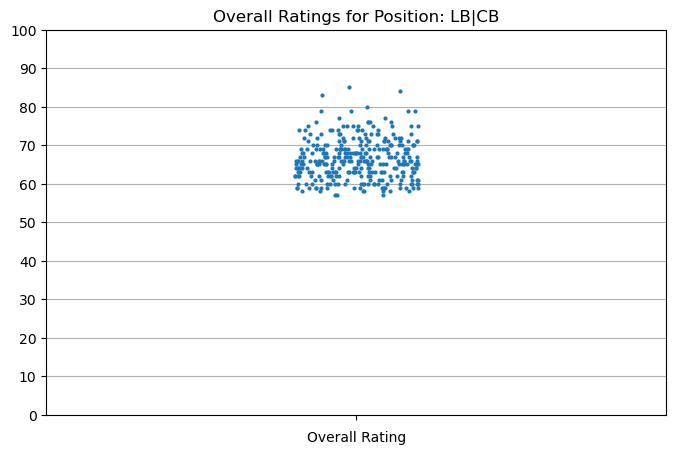

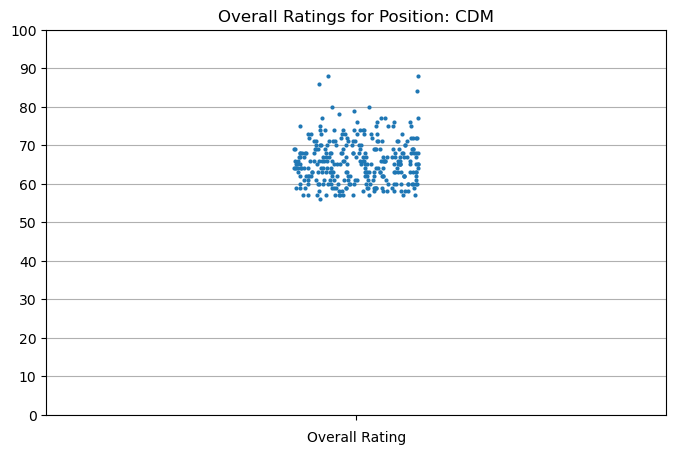

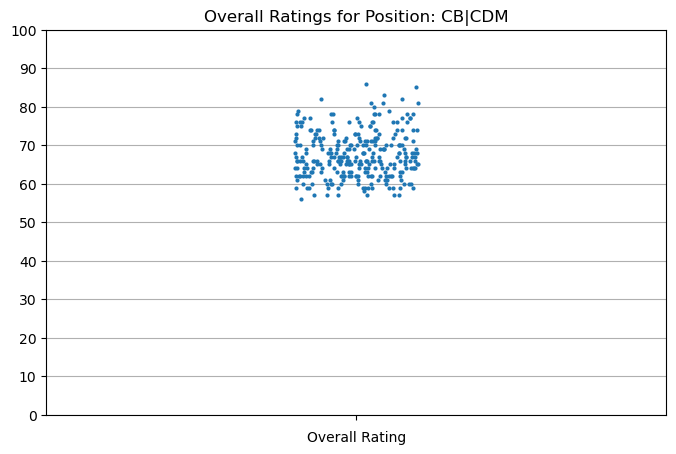

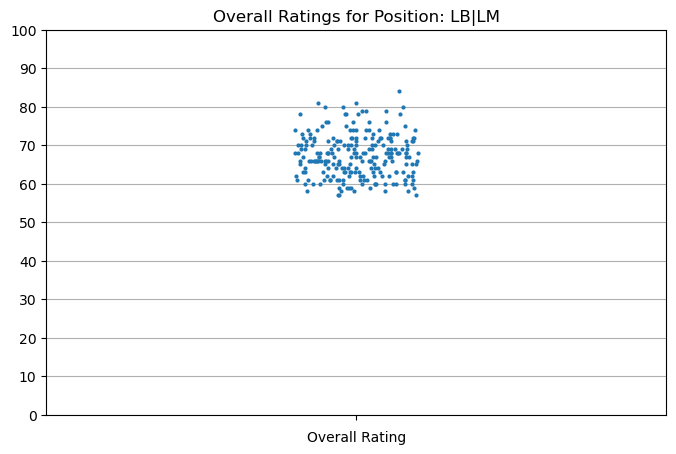

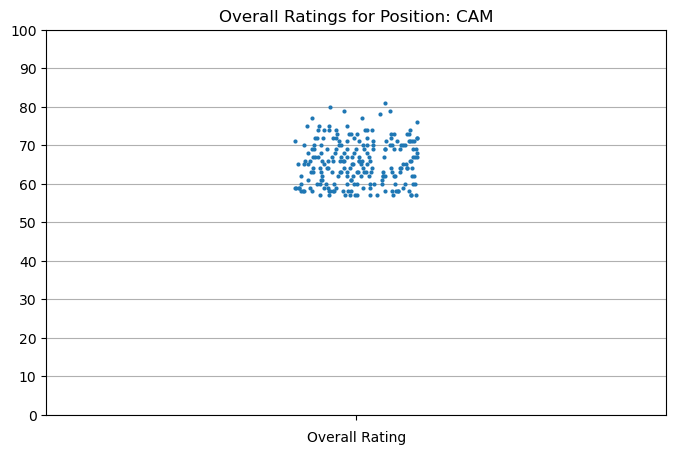

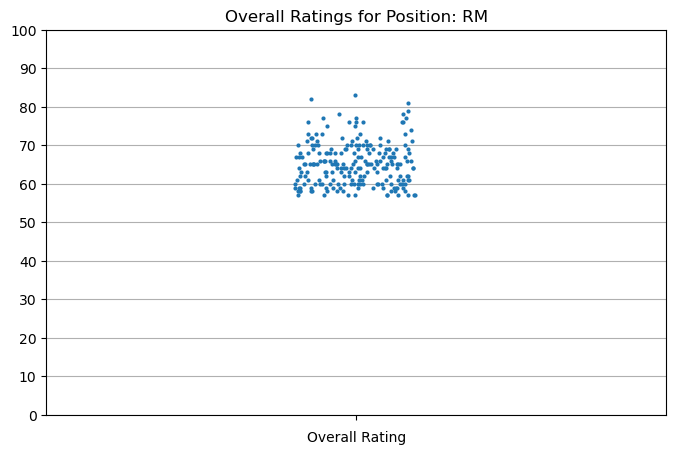

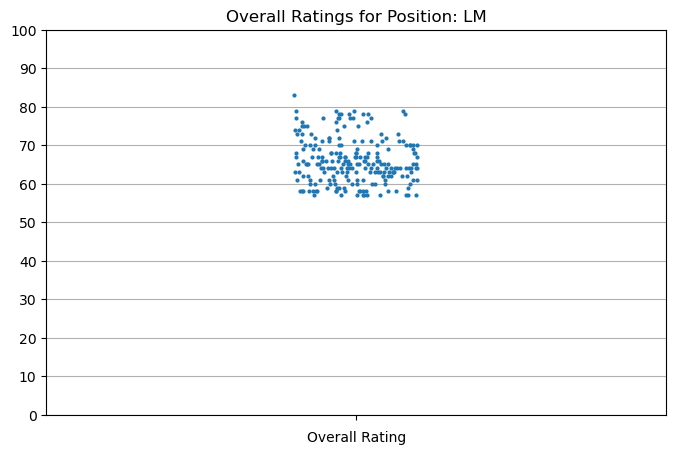

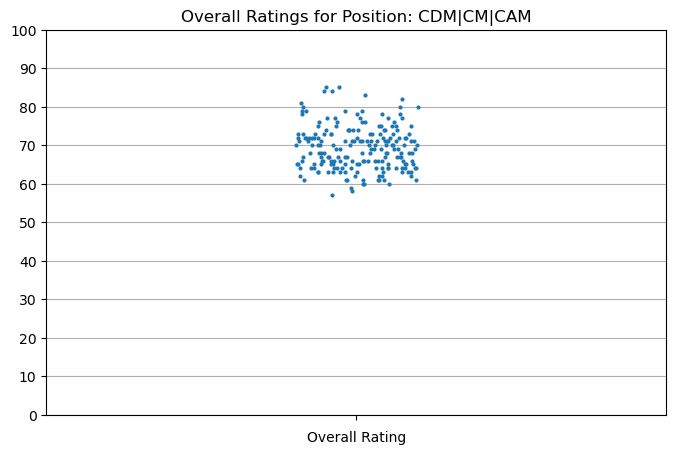

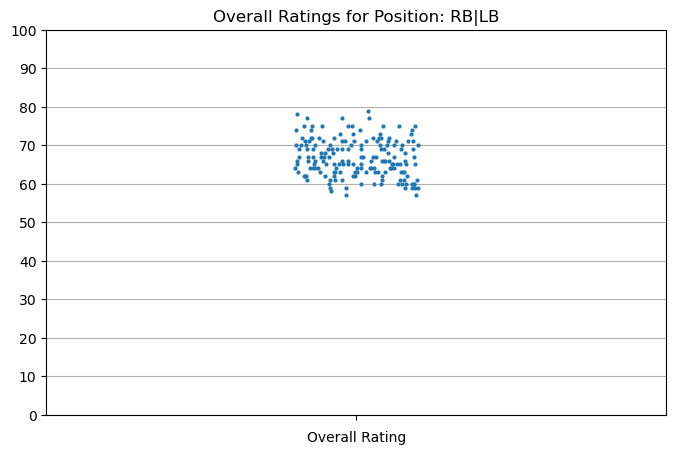

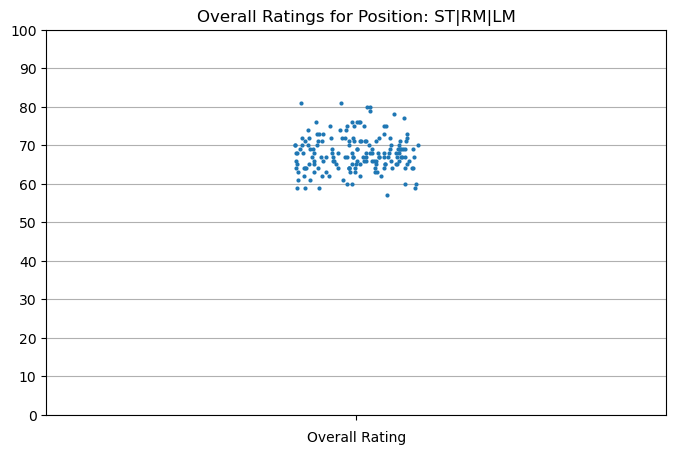

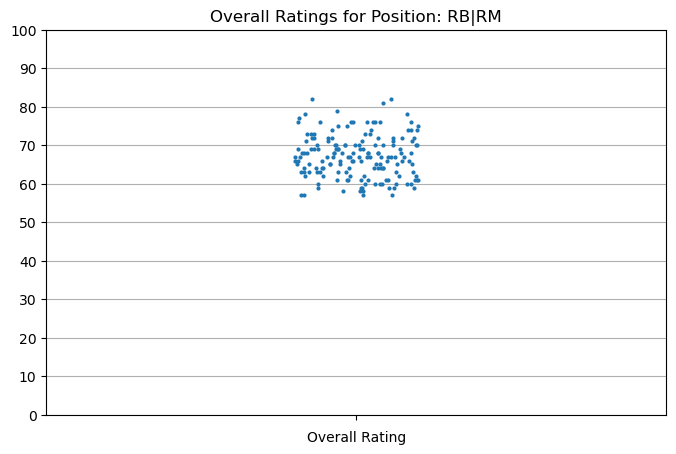

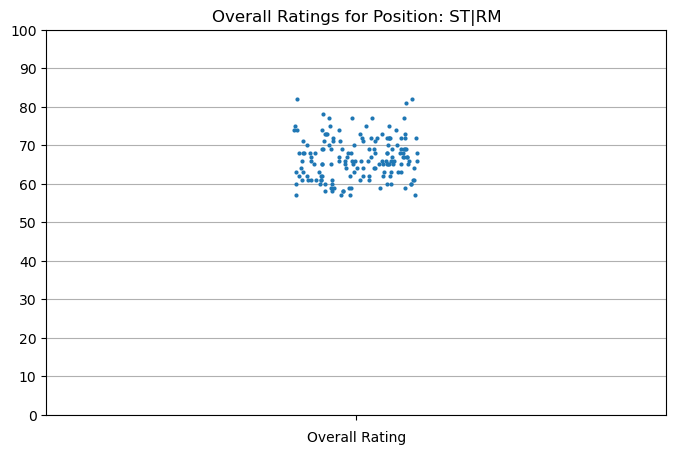

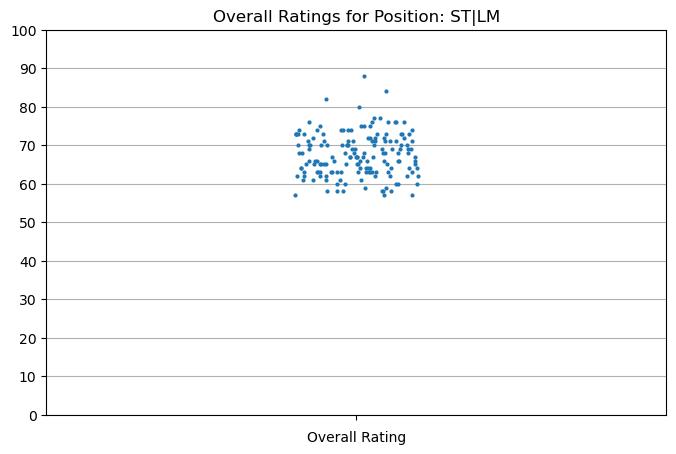

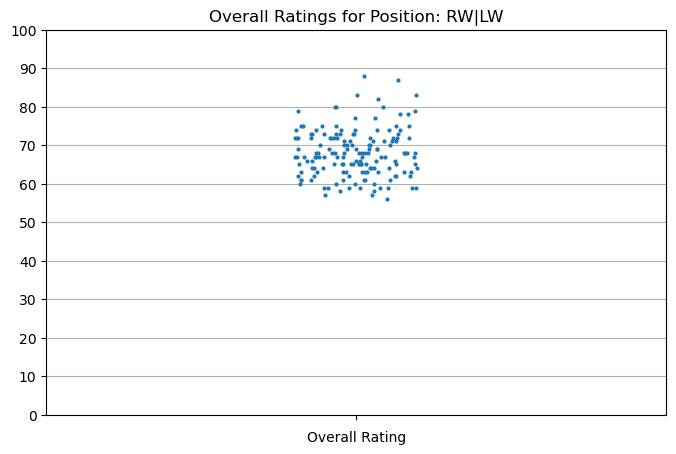

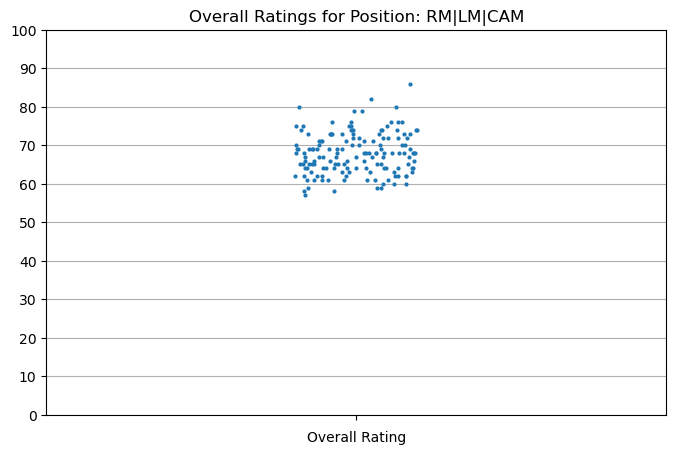

In [41]:
# Iterate through the top positions and create individual plots
for position in top_positions['position']:
    position_data = df[df['position'] == position]
    plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
    sns.stripplot(data=position_data, y='overall', size=3)
    plt.title(f'Overall Ratings for Position: {position}')
    plt.xlabel('Overall Rating')
    plt.ylabel('')
    plt.ylim(0, 100)  # Adjust the y-axis limits if needed
    plt.yticks(range(0, 101, 10))  # Adjust y-axis ticks if needed
    plt.grid(axis='y')
    plt.show()

- **Strip Plot**: The strip plot showcased individual player ratings as data points for each position. However, in positions with numerous players, such as CB or GK, the strip plot may become cluttered, making it challenging to visualize individual data points.

#### Insights and Implications:

The analysis and visualizations demonstrated that player positions have a notable impact on their overall ratings. Different positions have varying average ratings, spreads, and even potential outliers, indicating a diverse spectrum of player capabilities within each role.

Understanding these variations is essential for football enthusiasts, coaches, and players alike. It sheds light on the expectations, skill requirements, and performance attributes associated with specific positions, enriching our understanding of the intricate dynamics of the game.

By analyzing the relationship between player positions and overall ratings, we gain valuable insights into how these factors interact to shape player performance in the virtual football realm.

--------------------------------------------


#### Nationality and Overall Ratings

In this section, we explore the relationship between the "nationality" of players and their "overall" ratings. This analysis included summary statistics, visualizations, and correlation coefficient calculations. Let's delve into the observations and insights derived from our analysis:

In [42]:
df['nationality'].unique()
df['nationality'].nunique()
nationality_stats = df.groupby(by = 'nationality')['overall'].agg(['mean', 'median', 'std','max','min', 'count']).reset_index()
nationality_stats.sort_values(by = 'count',ascending = False, inplace = True)
nationality_stats.reset_index(drop = True, inplace = True)

top_nationalities = nationality_stats.head(25)
top_nationalities

,nationality,mean,median,std,max,min,count
0,England,65.250000,64.0,5.687780,89,57,1496
1,Germany,66.799649,66.0,5.853257,90,57,1138
2,Spain,69.874882,69.0,6.264224,89,56,1055
3,Argentina,69.165979,69.0,5.792622,94,57,970
4,France,68.285865,68.0,6.600497,89,56,948
5,Brazil,71.422819,71.0,5.333468,92,57,894
6,Italy,68.739403,68.0,5.693804,88,57,637
7,Colombia,66.843137,67.0,5.369257,84,56,561
8,Japan,65.250000,65.0,4.402054,79,57,448
9,Netherlands,68.098086,67.0,6.106367,91,57,418


#### Summary Statistics:

- We started by grouping the dataset based on "nationality" and calculating various aggregate statistics for the "overall" ratings of players from each nationality. 
- These statistics included mean, median, standard deviation, maximum, minimum, and count of players. 
- Our focus was on the top 25 nationalities with the highest player counts. 
- These measures helped us understand the central tendency, spread, and range of ratings among the selected nationalities.

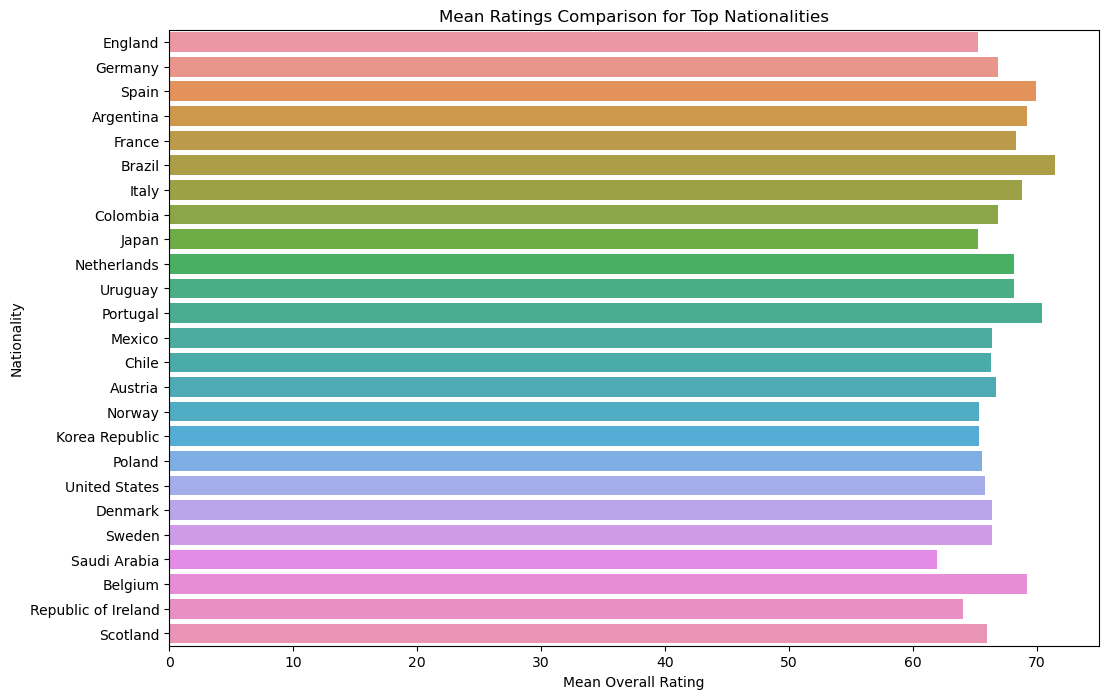

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y='nationality', data=top_nationalities, orient='h')
plt.xlabel('Mean Overall Rating')
plt.ylabel('Nationality')
plt.title('Mean Ratings Comparison for Top Nationalities')
plt.show()


#### Mean Ratings Comparison

The bar plot highlighted variations in average player ratings among the top nationalities. Notably, countries like Brazil, Argentina, and Spain exhibited relatively higher average ratings, while countries like Saudi Arabia and Japan tended to have lower average ratings.

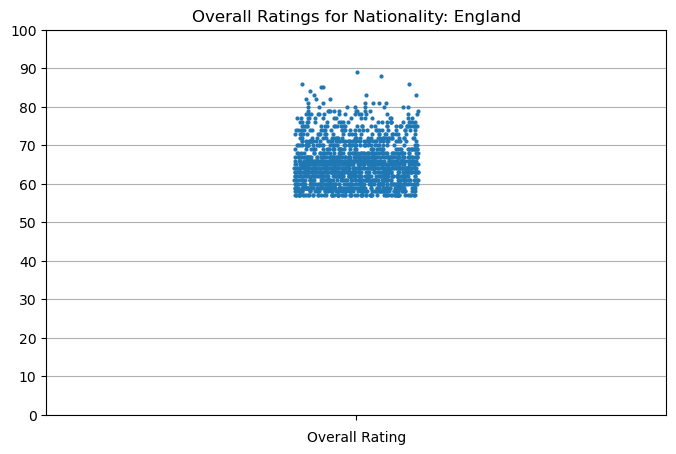

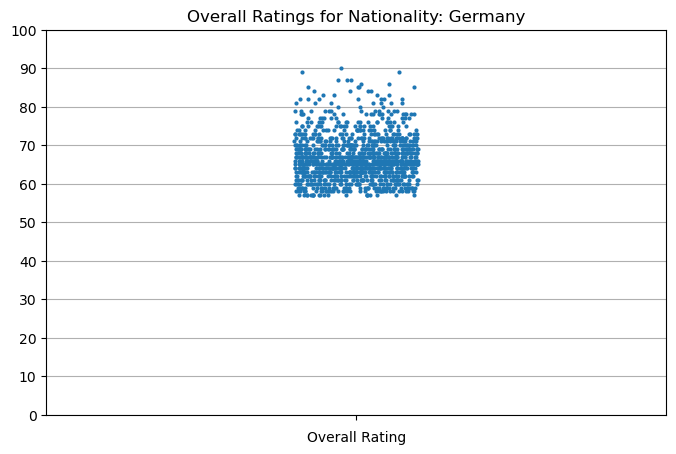

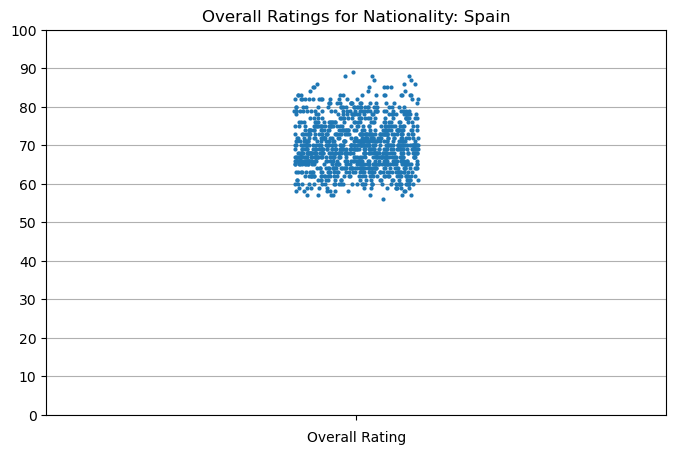

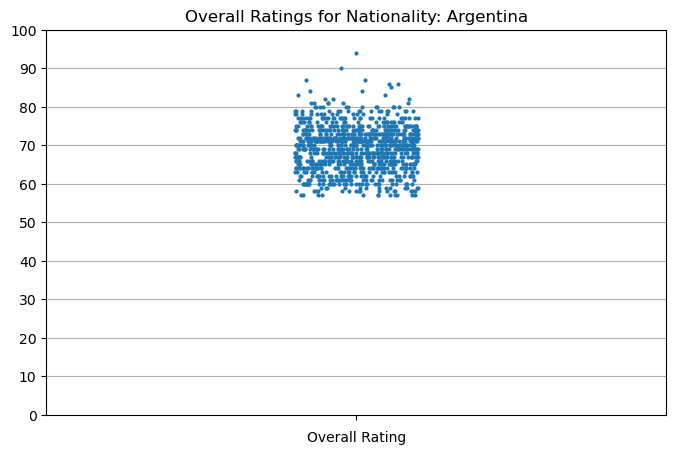

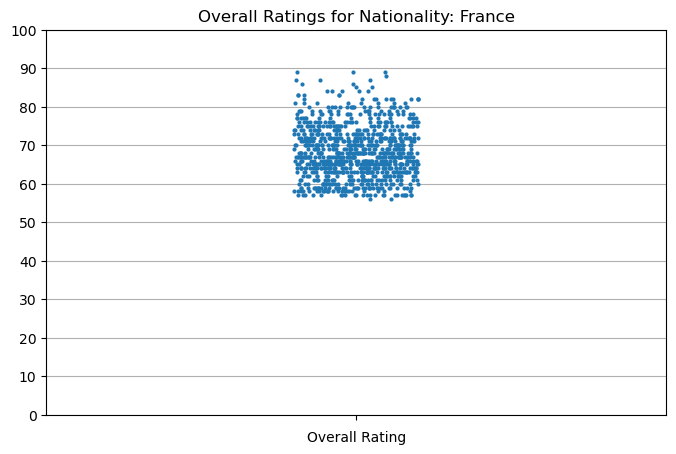

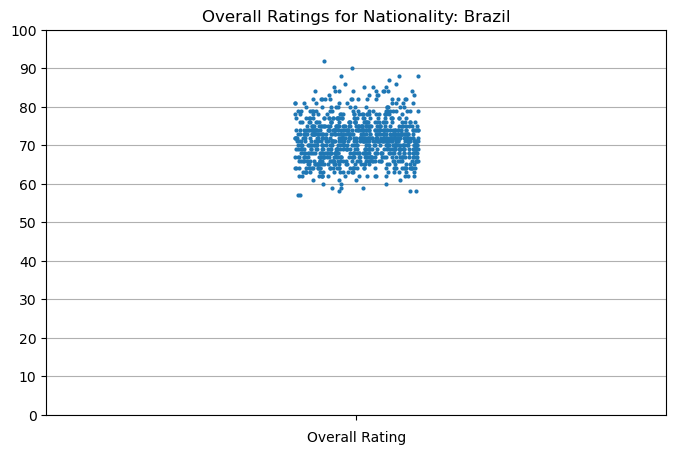

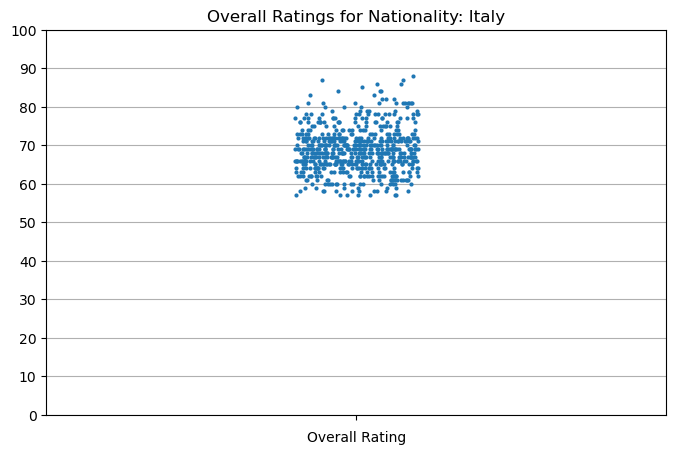

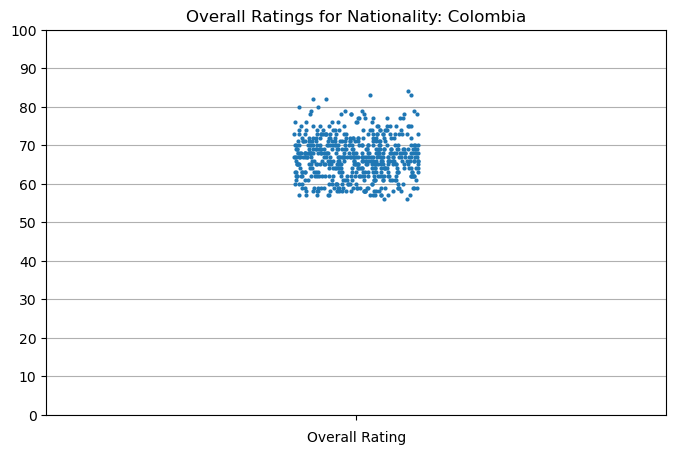

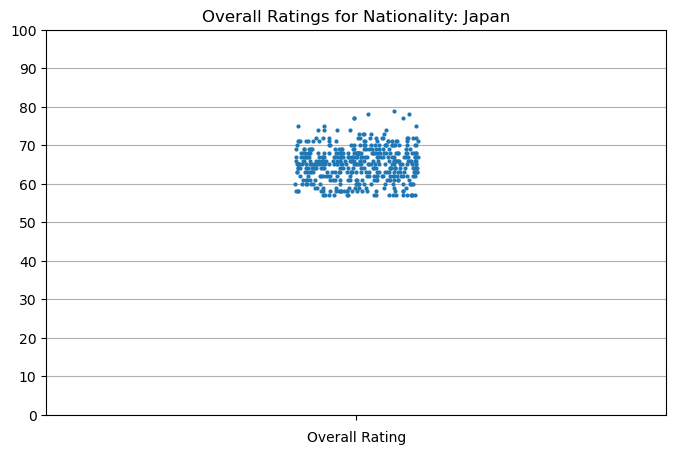

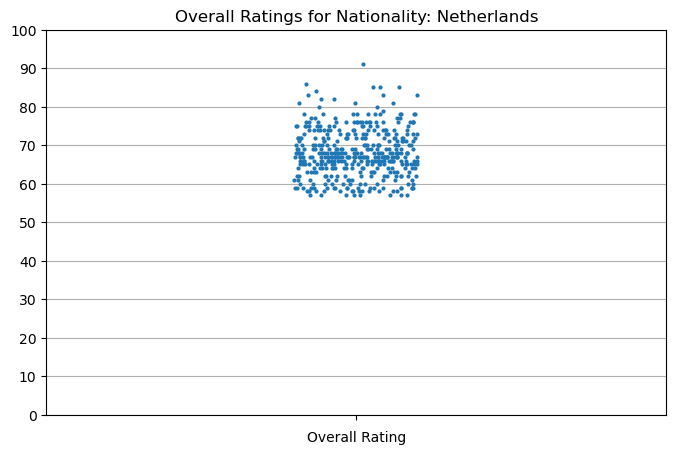

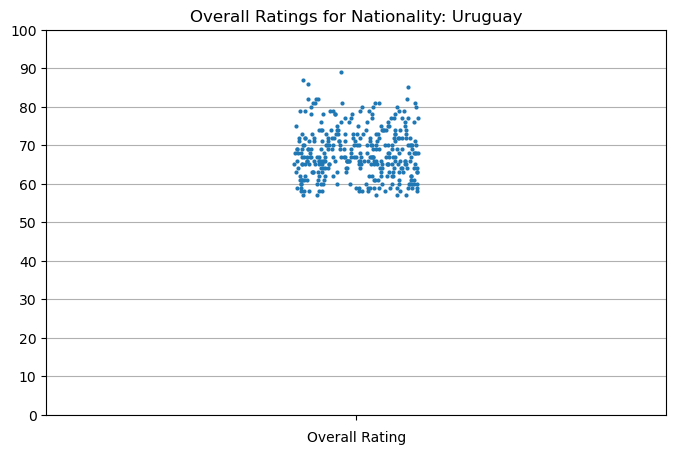

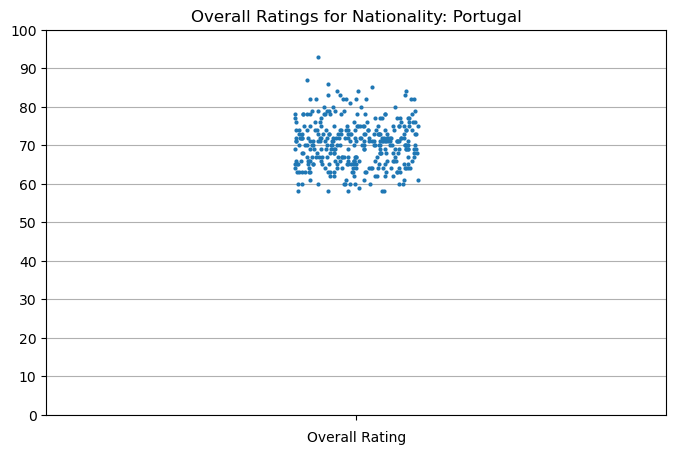

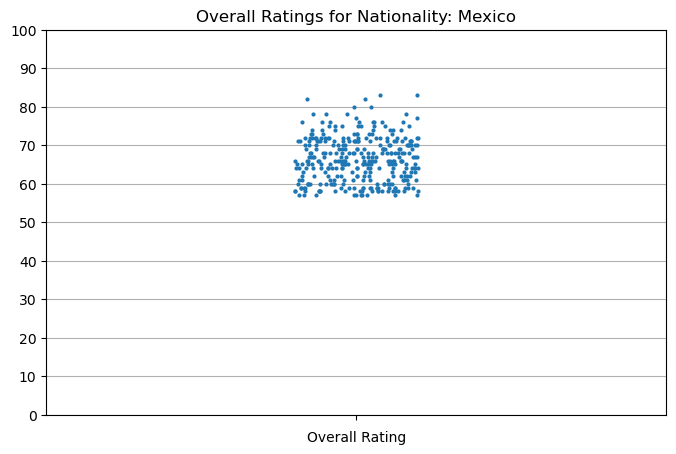

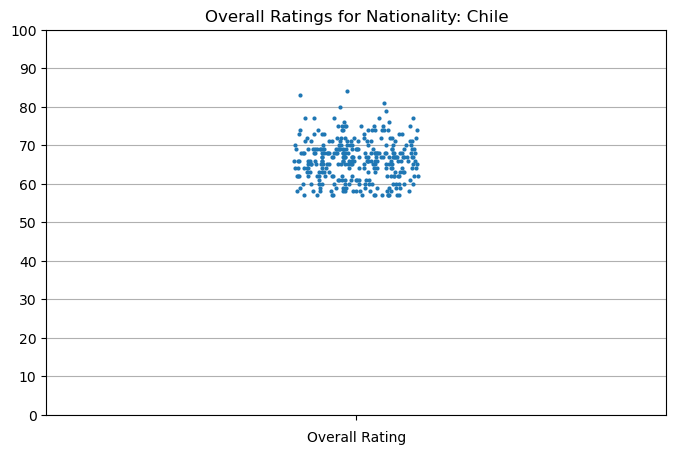

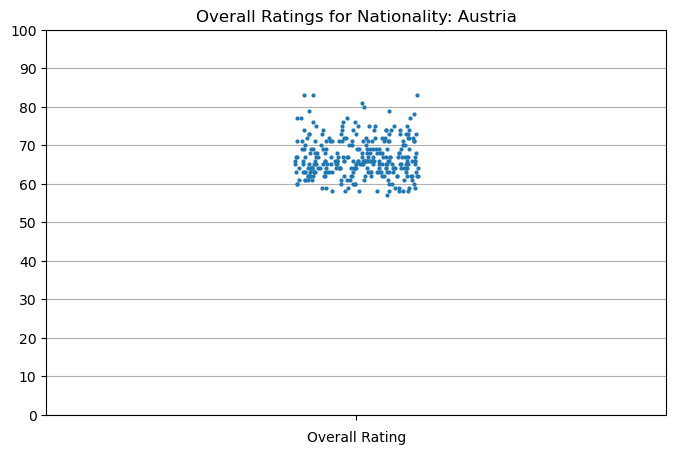

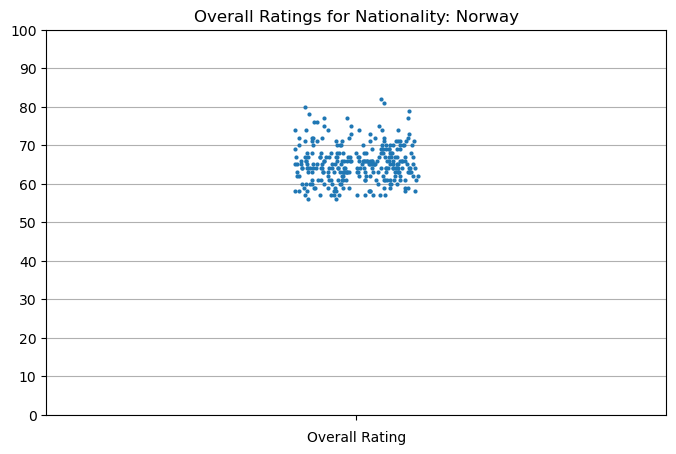

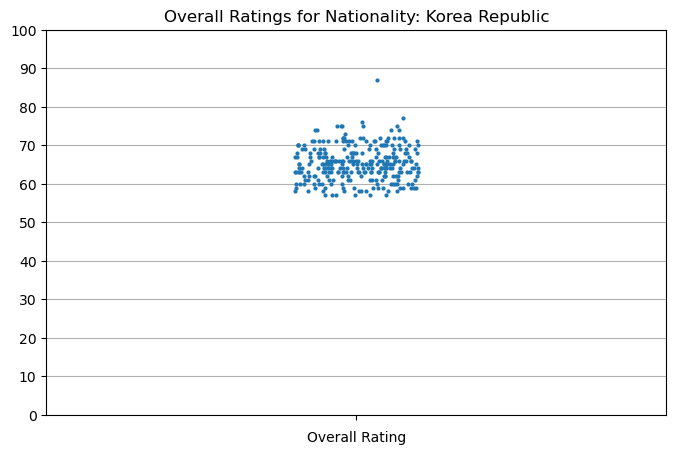

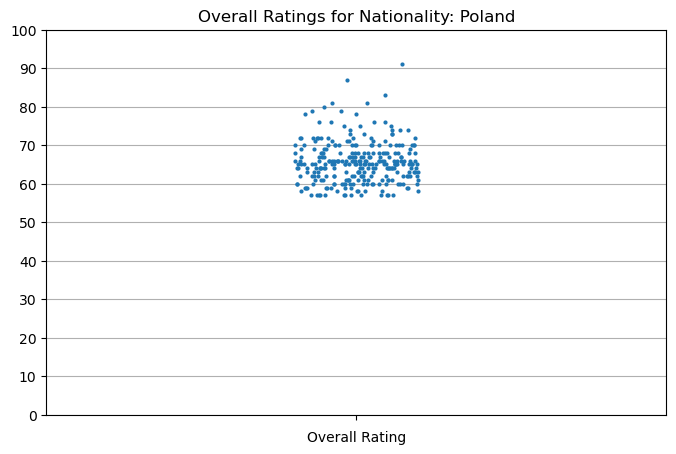

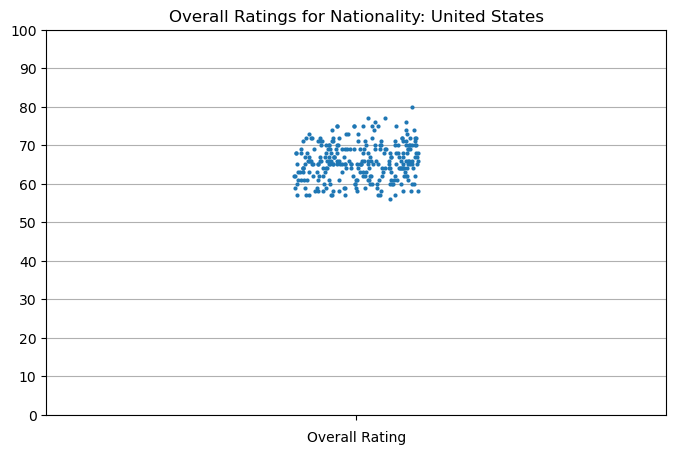

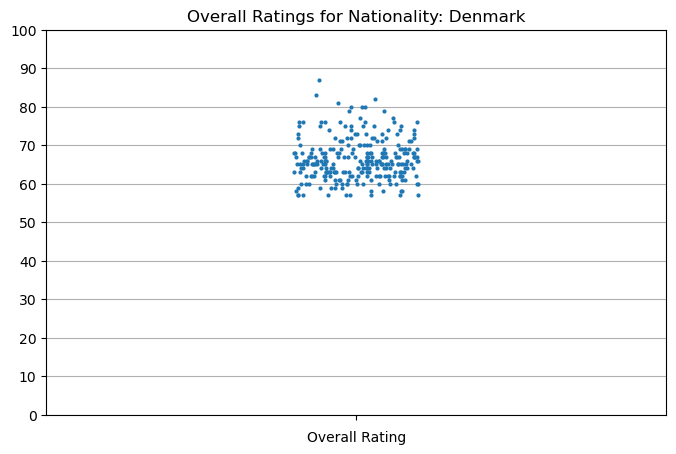

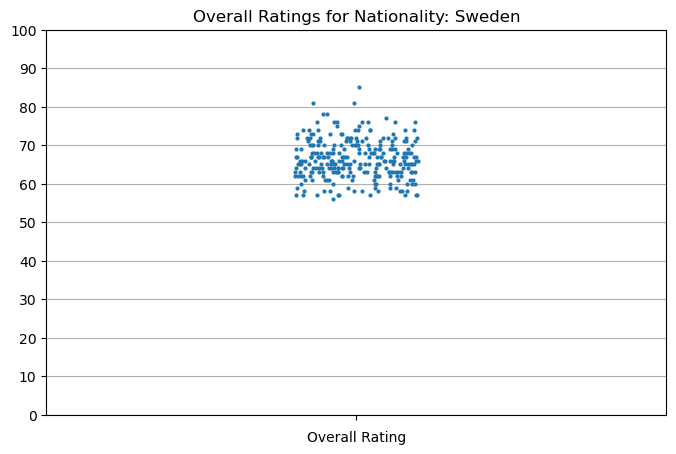

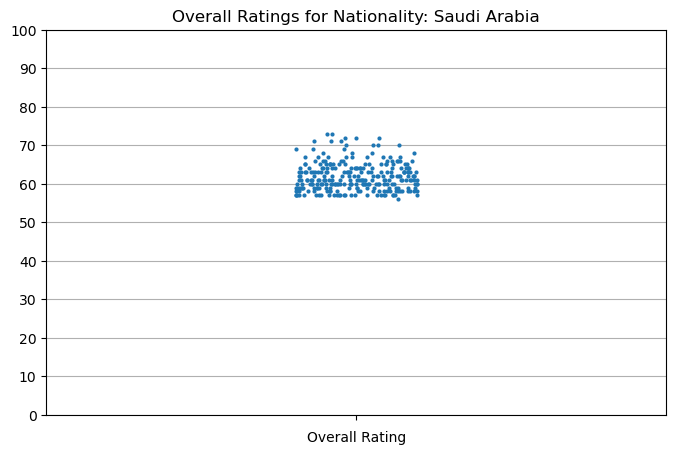

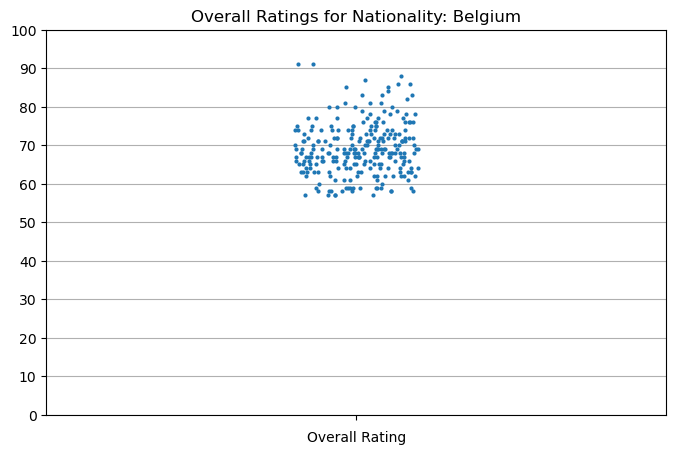

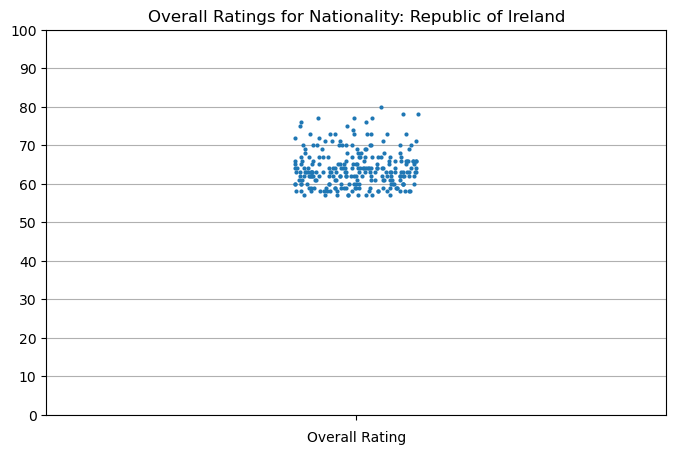

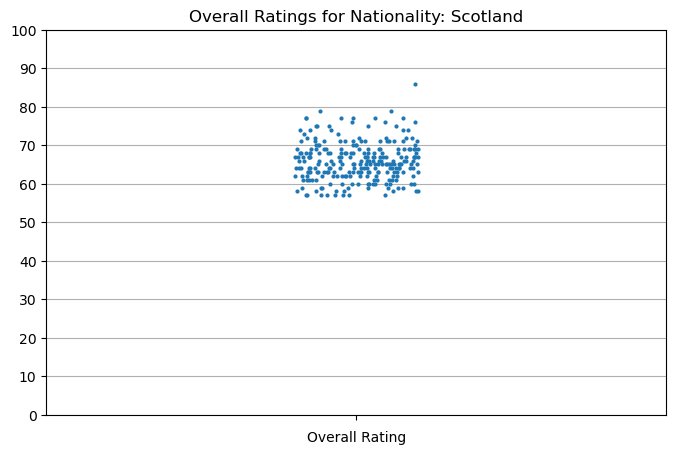

In [44]:
# Iterate through the top nationalities and create individual plots
for nationality in top_nationalities['nationality']:
    nationality_data = df[df['nationality'] == nationality]
    plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
    sns.stripplot(data=nationality_data, y='overall', size=3)
    plt.title(f'Overall Ratings for Nationality: {nationality}')
    plt.xlabel('Overall Rating')
    plt.ylabel('')
    plt.ylim(0, 100)  # Adjust the y-axis limits if needed
    plt.yticks(range(0, 101, 10))  # Adjust y-axis ticks if needed
    plt.grid(axis='y')
    plt.show()


#### Distribution of Ratings

The strip plot effectively portrayed the distribution of player ratings for each nationality. It revealed the concentration of ratings and potential outliers. Some nationalities displayed a narrow distribution of ratings, while others showed greater dispersion.


In [45]:
# Calculate the average ratings and player counts
average_ratings = top_nationalities['mean']
player_counts = top_nationalities['count']

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(average_ratings, player_counts)[0, 1]

# Print the correlation coefficient
print("Pearson Correlation Coefficient:", correlation_coefficient)

Pearson Correlation Coefficient: 0.34290714817562656


**Correlation Coefficient:** The positive correlation coefficient of 0.3429 suggested a modest positive relationship between average player ratings and player counts. This indicated that, as a general trend, nationalities with more players tended to have slightly higher average ratings.

Our analysis provided valuable insights into how player nationality is associated with player ratings. The visualizations and correlation coefficient enhanced our understanding of rating distribution, variability, and the potential influence of player counts on average ratings.

---------------------------------

#### Position vs. Potential:

In this section, we explore the relationship between the "position" of players and their "potential" ratings. This analysis involved examining summary statistics, data visualizations, and calculating the Pearson correlation coefficient. Let's delve into the insights and observations drawn from our analysis:

In [46]:
df['position'].unique()
df['position'].nunique()
position_stats = df.groupby(by = 'position')['potential'].agg(['mean', 'median', 'std','max','min', 'count']).reset_index()
position_stats.sort_values(by = 'count',ascending = False, inplace = True)
position_stats.reset_index(drop = True, inplace = True)

top_positions = position_stats.head(25)
top_positions

,position,mean,median,std,max,min,count
0,CB,71.857143,71.0,5.771055,92,57,2296
1,GK,70.689490,70.0,6.018089,93,57,1884
2,ST,71.533865,71.0,5.947245,91,57,1757
3,CDM|CM,72.520699,72.0,5.905504,91,57,1546
4,LB,70.762590,70.0,5.680979,89,58,695
5,CM,71.738487,72.0,6.198185,92,58,608
6,RB,70.876238,71.0,5.396313,90,58,606
7,CM|CAM,73.797590,74.0,6.103970,91,58,415
8,RM|LM,71.589372,71.0,5.872782,88,58,414
9,RB|CB,71.428218,71.0,5.873125,89,57,404


#### Summary Statistics

- We started by grouping the dataset based on "position" and calculating various aggregate statistics for the "potential" ratings of players from each position. 
- These statistics included mean, median, standard deviation, maximum, minimum, and count of players. 
- Our focus was on the top 25 positions with the highest player counts. 
- These measures helped us understand the central tendency, spread, and range of potential ratings among the selected positions.

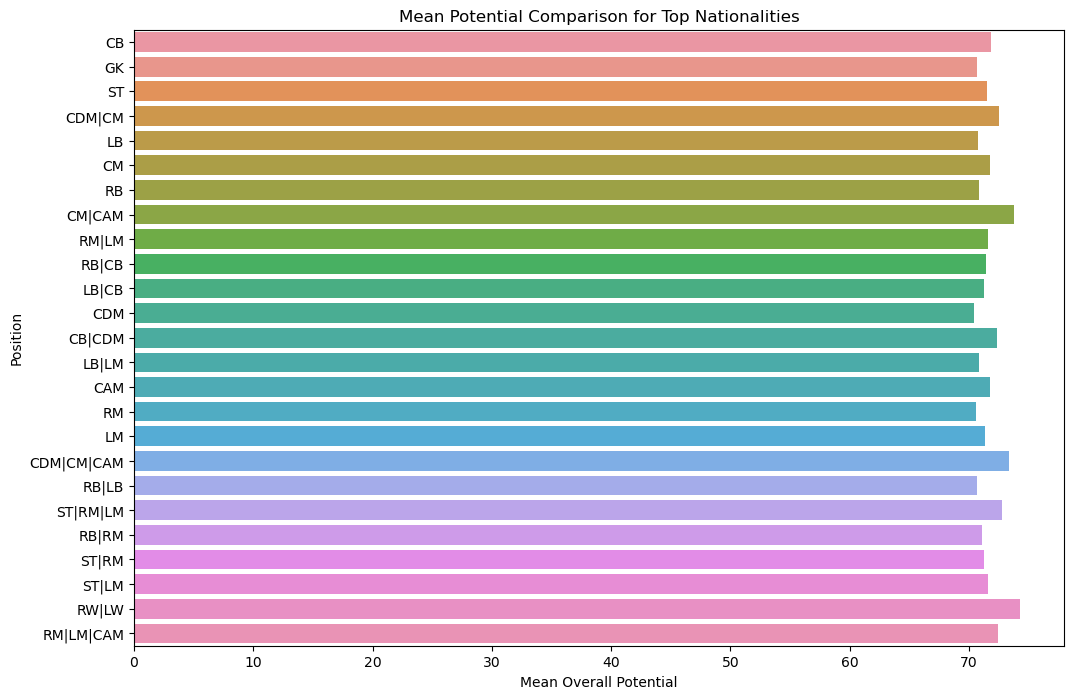

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y='position', data=top_positions, orient='h')
plt.xlabel('Mean Overall Potential')
plt.ylabel('Position')
plt.title('Mean Potential Comparison for Top Nationalities')
plt.show()

#### Mean Potential Ratings Comparison

The bar plot allowed us to compare the average potential ratings across different player positions. We observed variations in average potential ratings among positions. For instance, positions like RW|LW and CDM|CM|CAM tended to have higher average potential ratings, while positions like LB and RB|LM exhibited relatively lower average potential ratings.

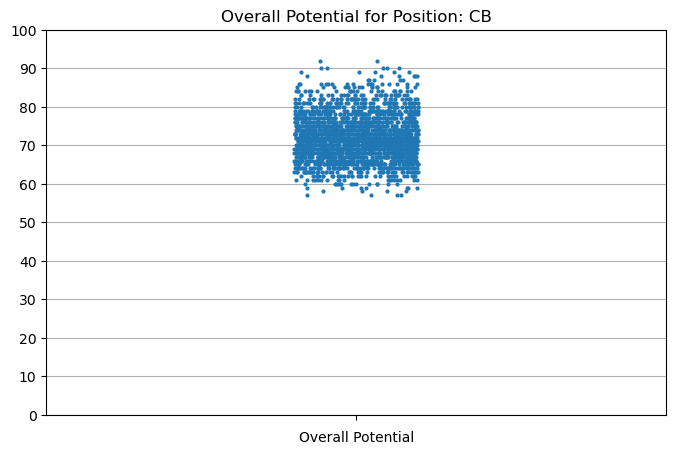

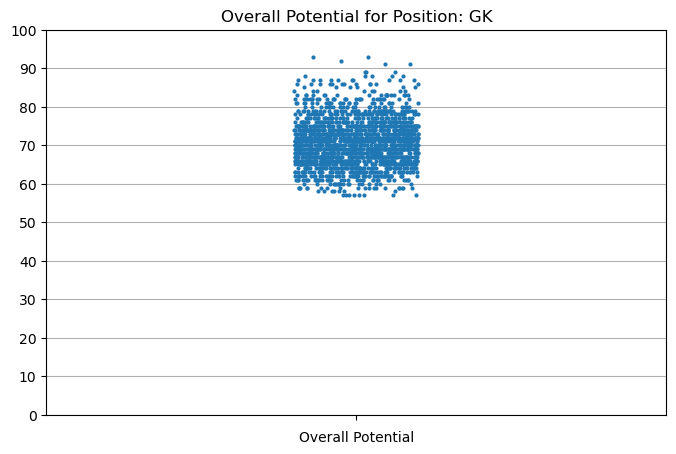

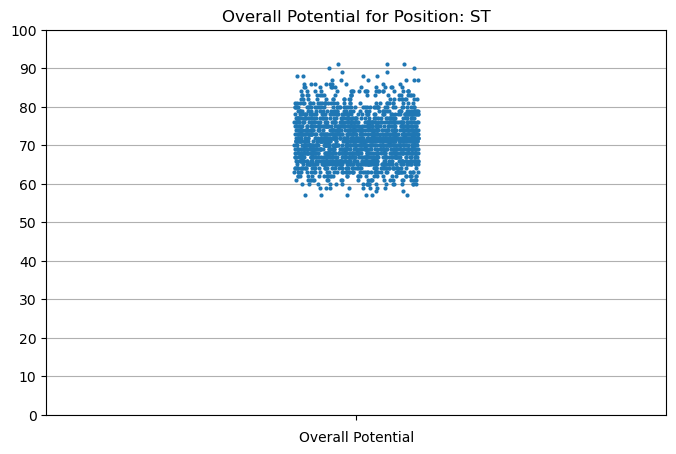

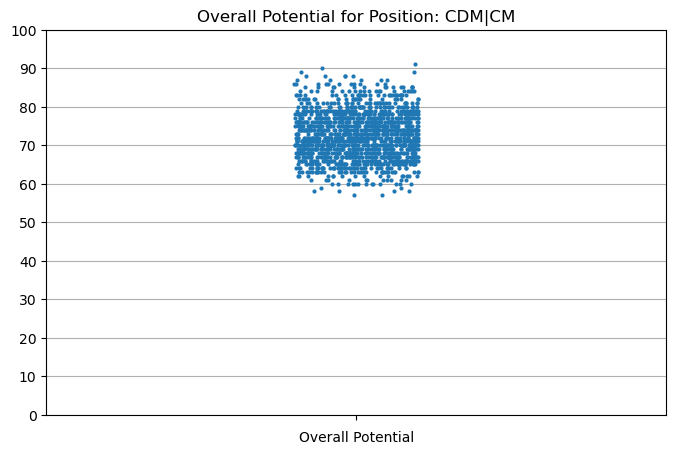

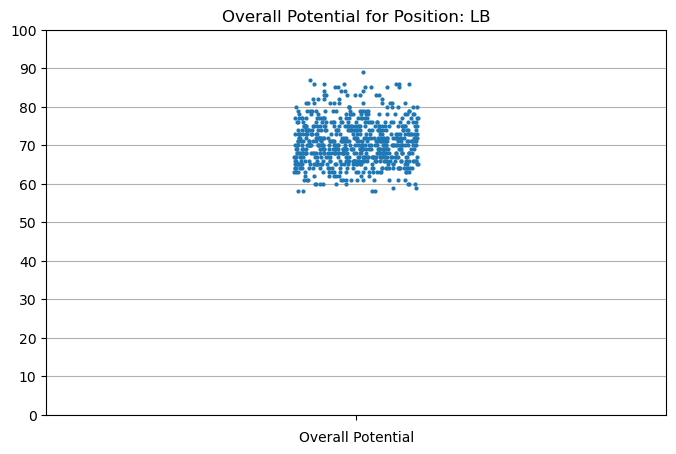

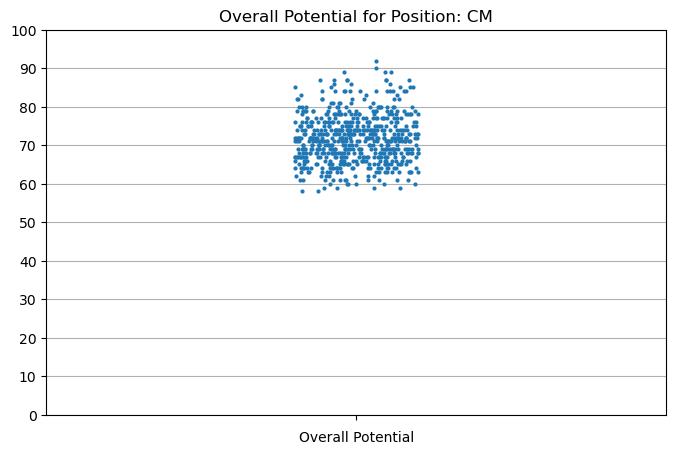

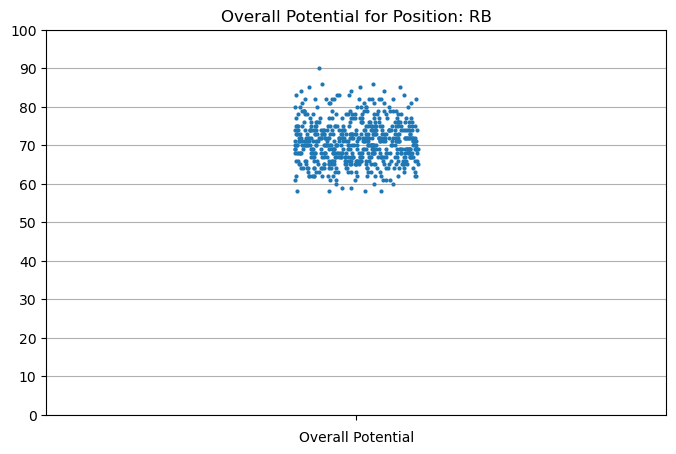

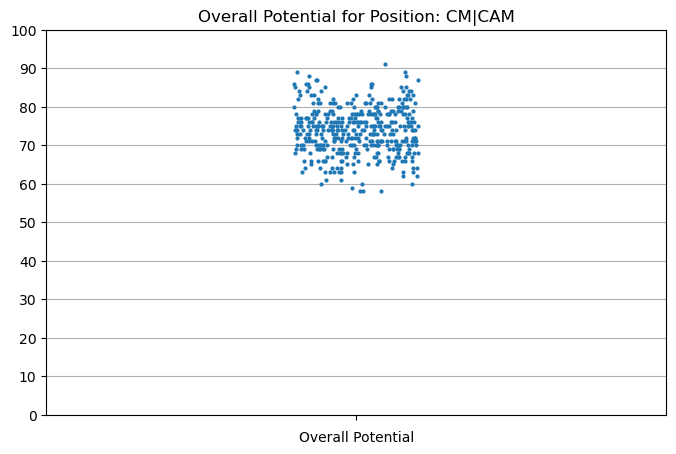

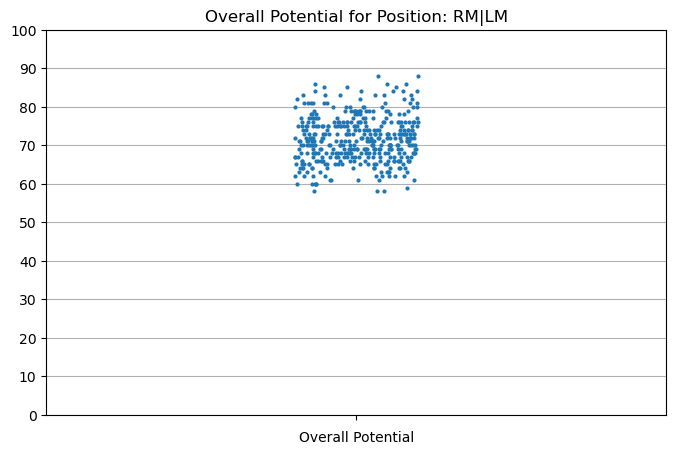

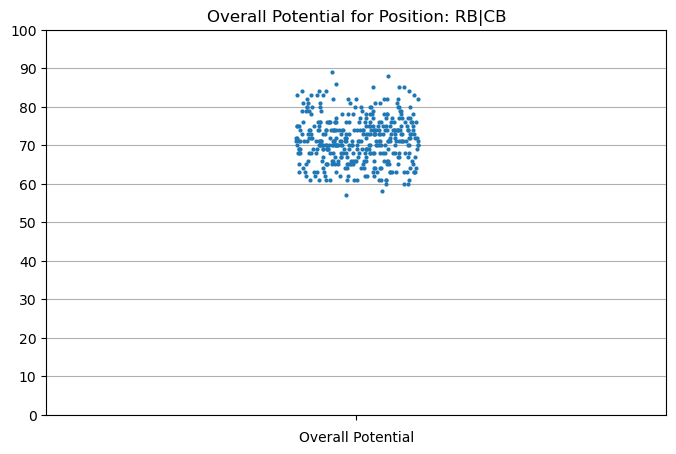

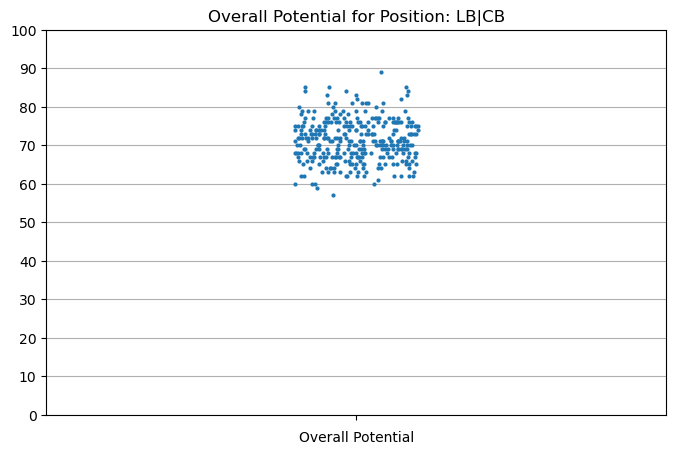

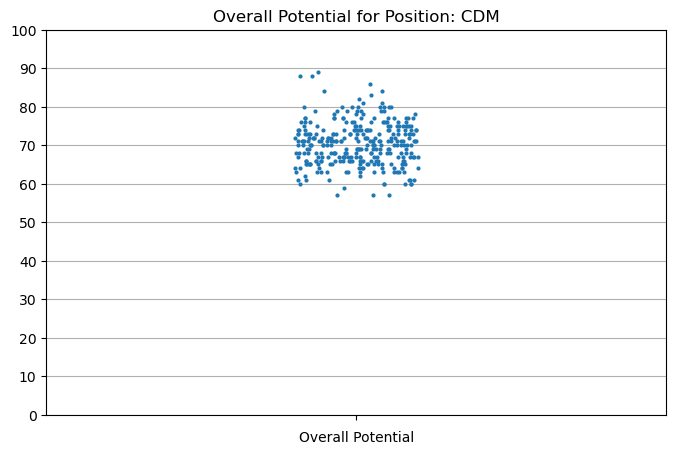

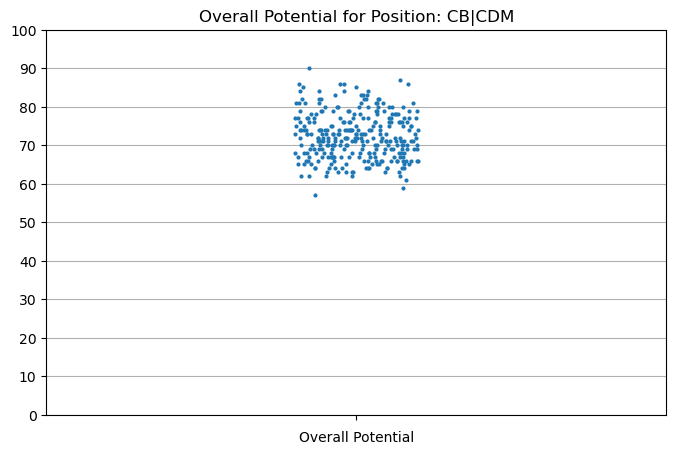

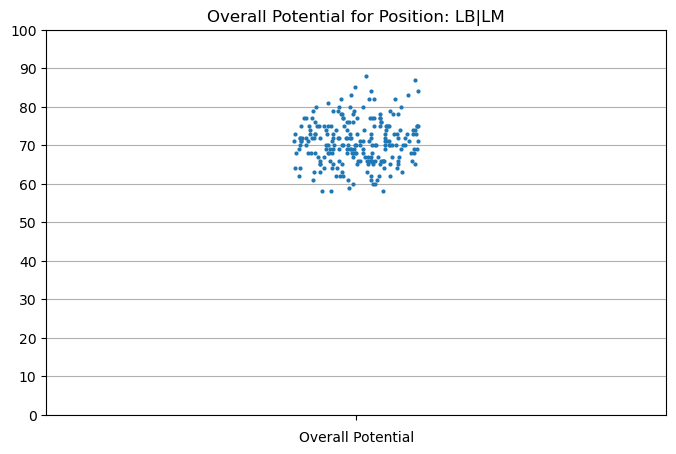

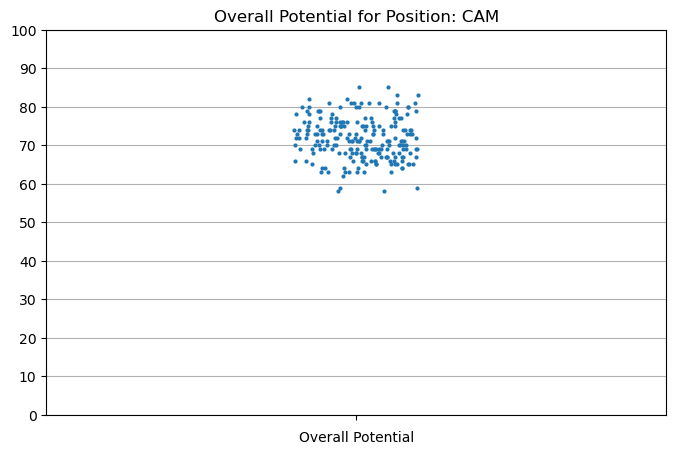

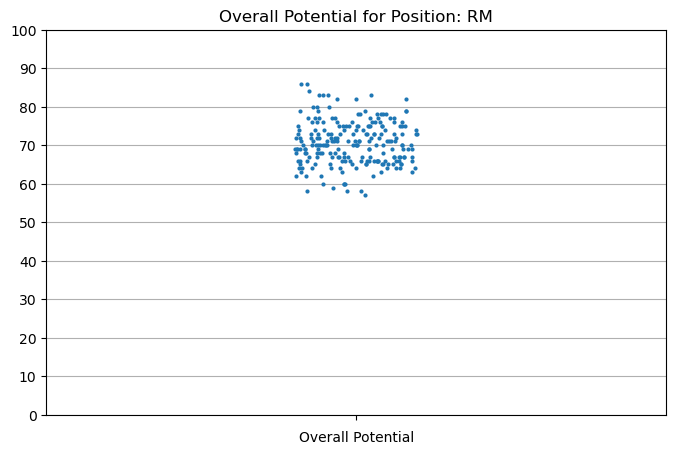

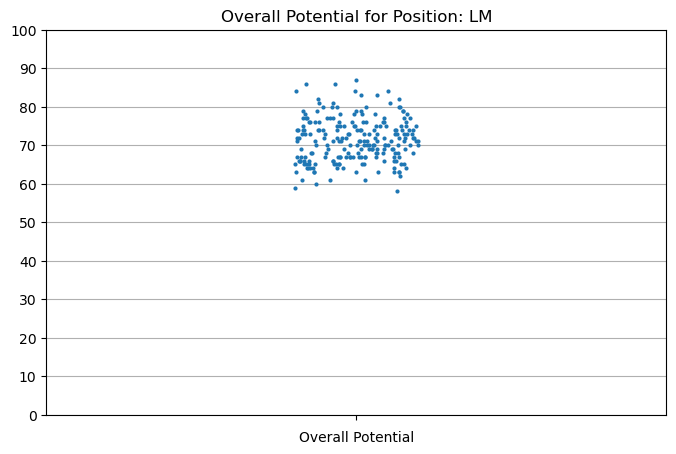

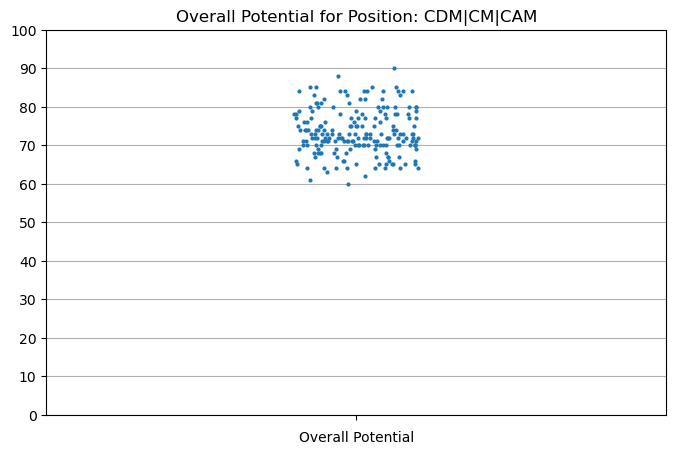

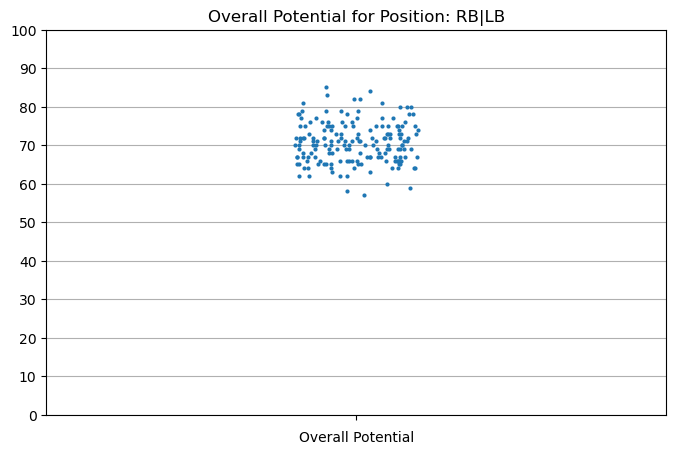

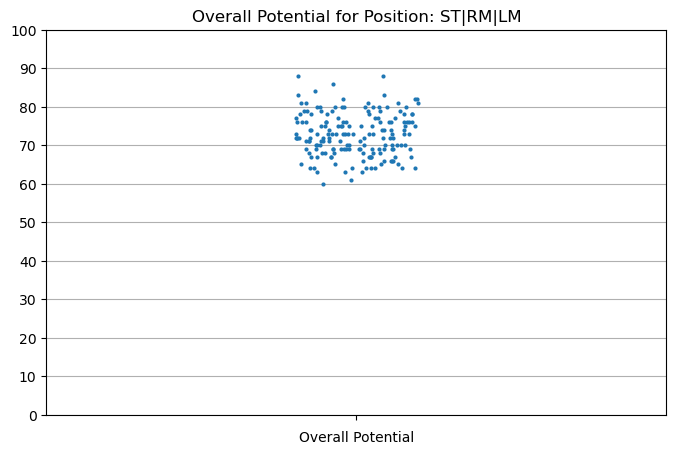

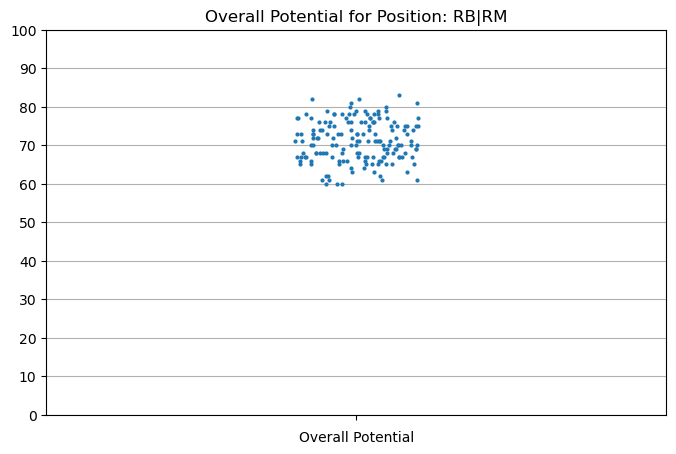

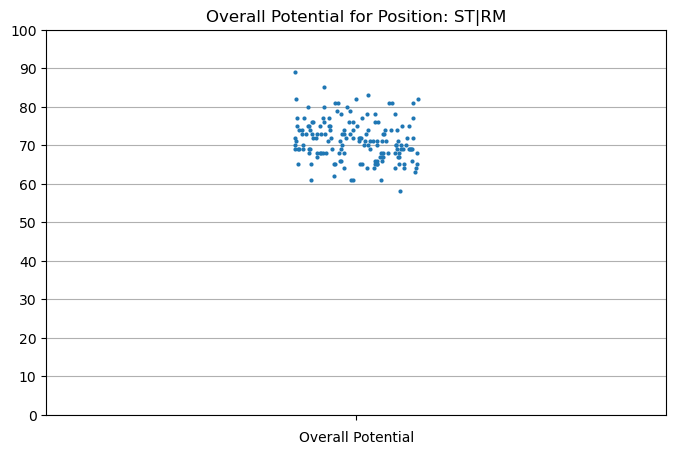

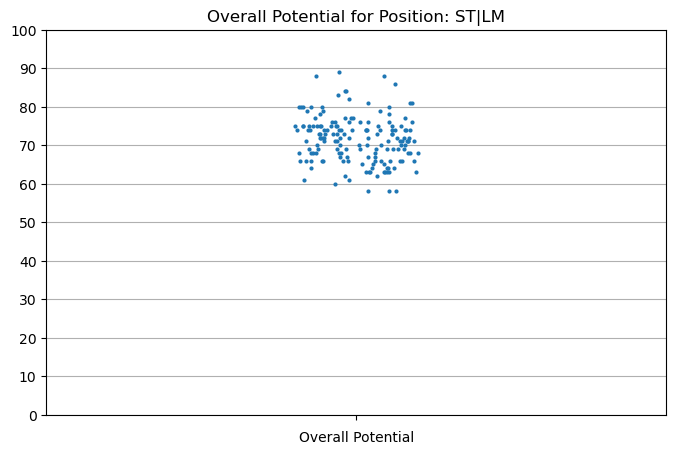

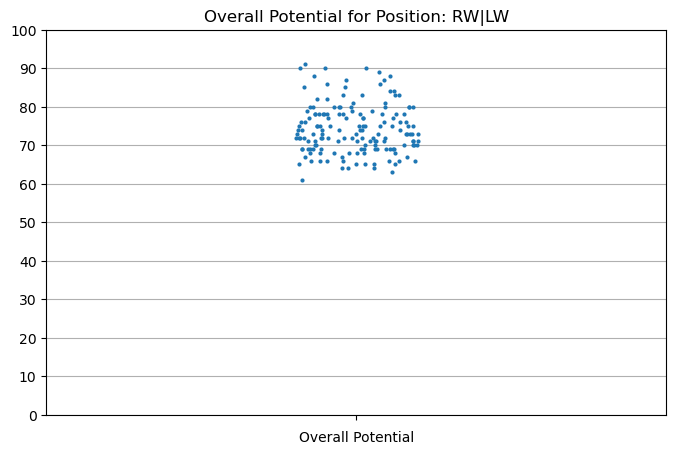

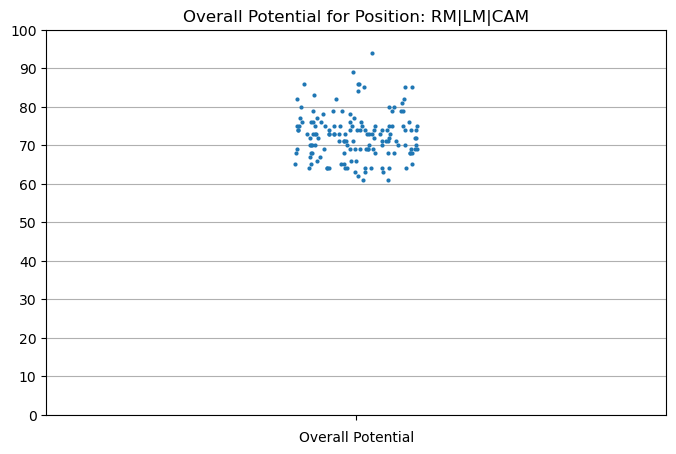

In [48]:
# Iterate through the top nationalities and create individual plots
for position in top_positions['position']:
    position_data = df[df['position'] == position]
    plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
    sns.stripplot(data=position_data, y='potential', size=3)
    plt.title(f'Overall Potential for Position: {position}')
    plt.xlabel('Overall Potential')
    plt.ylabel('')
    plt.ylim(0, 100)  # Adjust the y-axis limits if needed
    plt.yticks(range(0, 101, 10))  # Adjust y-axis ticks if needed
    plt.grid(axis='y')
    plt.show()

#### Distribution of Potential Ratings

The strip plot displayed the distribution of player potential ratings for each position. It revealed the density of potential ratings and any potential outliers. Some positions displayed a concentrated distribution, while others showed wider dispersion.

In [49]:
# Calculate the average potential and player counts
average_potential = top_positions['mean']
player_counts = top_positions['count']

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(average_potential, player_counts)[0, 1]

# Print the correlation coefficient
print("Pearson Correlation Coefficient:", correlation_coefficient)

Pearson Correlation Coefficient: -0.09420293926132904


#### Pearson Correlation Coefficient

We calculated the Pearson Correlation Coefficient between the average player potential ratings and player counts for each position. The weak negative correlation coefficient of -0.0942 suggested that there is no substantial relationship between the average player potential ratings and player counts by position. This indicates that player counts within a position do not significantly influence average potential ratings.

Our analysis provided insights into how player positions are associated with player potential ratings. The visualizations and correlation coefficient contributed to our understanding of potential rating distribution, variability, and the potential influence of player counts on average potential ratings.

-------------------------------

## Multivariate Analysis:
#### 3D Scatter Plot of Age, Overall Rating, Potential, and Position

In this analysis, we utilized a 3D scatter plot to investigate the interplay between age, overall ratings, potential, and player positions. Given the vast number of positions (232), we focused on the top three positions—'CB' (Center Back), 'GK' (Goalkeeper), and 'ST' (Striker)—to ensure visual clarity and detail in the 3D scatter plot. This approach allowed us to explore how age and overall ratings relate to potential, while considering the distinctive characteristics of these prominent player positions.

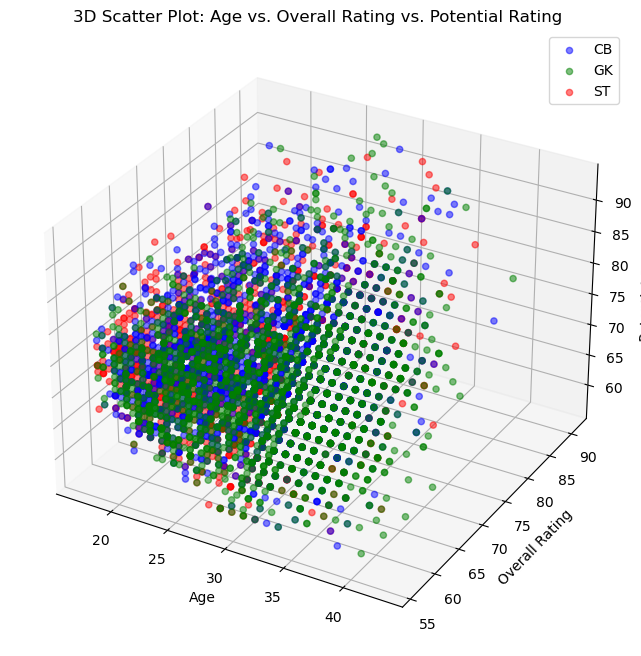

In [50]:
# Filter the dataframe to include only relevant columns
df_subset = df[['age', 'overall', 'potential', 'position']]

# Create a scatter plot with 3D axes
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Color dictionary for position-based coloring
position_colors = {
    'CB': 'blue',
    'GK': 'green',
    'ST': 'red',
    # Add more positions and colors here
}

# Iterate through each position and plot points with corresponding color
for position, color in position_colors.items():
    subset = df_subset[df_subset['position'] == position]
    ax.scatter(subset['age'], subset['overall'], subset['potential'], c=color, label=position, alpha=0.5)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Overall Rating')
ax.set_zlabel('Potential Rating')
ax.set_title('3D Scatter Plot: Age vs. Overall Rating vs. Potential Rating')

# Add legend
ax.legend()

# Show the plot
plt.show()

#### Key Observations and Findings:

1. **Position-Based Patterns:**
   - Different player positions are distinguished by various colors, forming separate clusters of data points.
   - Blue points primarily represent players occupying the 'CB' (Center Back) position, signifying a diverse range of ages, overall ratings, and potential ratings.
   - Green points correspond to 'GK' (Goalkeeper) positions, coalescing into a more tightly packed cluster with varying ages and potential ratings, potentially indicating unique characteristics for goalkeepers.
   - Red points, associated with 'ST' (Striker) positions, exhibit a scattered distribution across the plot, showcasing a wide spectrum of ages, overall ratings, and potential ratings.

2. **Age and Potential Relationship:**
   - The scatter plot does not suggest a prominent correlation between a player's age and their potential rating, as data points are dispersed across the entire plot.
   - However, there may be a slight trend where younger players (lower age values) tend to exhibit a slightly broader range of potential ratings, particularly within the striker and goalkeeper positions.

3. **Age and Overall Rating:**
   - Similar to the age-potential relationship, no distinct pattern emerges that would indicate a strong correlation between age and overall rating.
   - Players of varying ages are present at different levels of overall ratings, regardless of their designated positions.

4. **Position and Potential/Overall Rating:**
   - The color-coded representation based on player positions offers insights into how positions intersect with potential and overall ratings.
   - Each position showcases a distinct distribution of potential and overall ratings, implying that the player's position could significantly influence these ratings.

---------------------------------------------------------------


#### Position-Nationality Combinations and Overall Ratings

In this analysis, we focused on exploring the relationships between positions, nationalities, and player overall ratings. Since there are a total of 3949 unique combinations of positions and nationalities, we chose to concentrate on the top 25 combinations to facilitate visualization and analysis.

In [51]:
position_nationality_group = df.groupby(['position', 'nationality'])['overall'].agg(['mean', 'median', 'std','max','min', 'count']).reset_index()
position_nationality_group.sort_values(by = 'count', ascending = False, inplace = True)
position_nationality_group.reset_index(drop = True, inplace = True)
position_nationality_group[:25]

,position,nationality,mean,median,std,max,min,count
0,CB,England,66.133971,65.0,5.734615,83,57,209
1,ST,England,64.719101,64.0,5.818320,89,57,178
2,GK,Germany,66.424658,65.0,6.457111,90,57,146
3,GK,England,65.014706,64.0,5.540404,81,57,136
4,CB,Argentina,69.948148,70.0,5.246631,83,57,135
5,CDM|CM,England,66.456000,66.0,5.109296,85,57,125
6,CB,Germany,68.258333,67.0,5.961354,87,58,120
7,CB,Brazil,71.833333,72.0,5.306304,87,58,120
8,CB,France,69.428571,68.0,6.869944,87,57,119
9,GK,Spain,68.771186,67.0,7.048563,88,56,118


### Key Findings:

1. **Common High-Rated Combinations:** The top 25 combinations comprise various positions and nationalities that consistently exhibit higher overall ratings. This suggests that players occupying these positions from these specific nationalities tend to possess superior skills or talents.

2. **Center-Back (CB) Dominance:** The Center-Back (CB) position appears frequently in the top 25 combinations. This indicates that players in this position tend to achieve higher overall ratings across a diverse range of nationalities.

3. **Country Influence:** Notable countries like England, Germany, Argentina, France, Spain, and Brazil have multiple combinations within the top 25. This implies that players from these particular countries are more likely to have higher overall ratings, regardless of their positions.

4. **Variability:** Certain combinations exhibit less variability in overall ratings, suggesting that players from these specific positions and nationalities tend to maintain more consistent ratings over time.

5. **Positional Impact:** Mean and median overall ratings vary significantly among different positions. For instance, goalkeepers (GK) from Germany and Brazil tend to have higher ratings compared to those from Italy. Similarly, central defensive midfielders (CDM|CM) from England, France, and Argentina tend to possess high overall ratings.

By focusing on the top 25 combinations, this analysis provides a streamlined view of the most significant trends and patterns. This approach avoids overwhelming complexity while effectively highlighting positions and nationalities that tend to produce higher-rated players.

These findings provide valuable insights into the relationships between player positions, nationalities, and overall ratings, laying the groundwork for more in-depth analysis and decision-making.

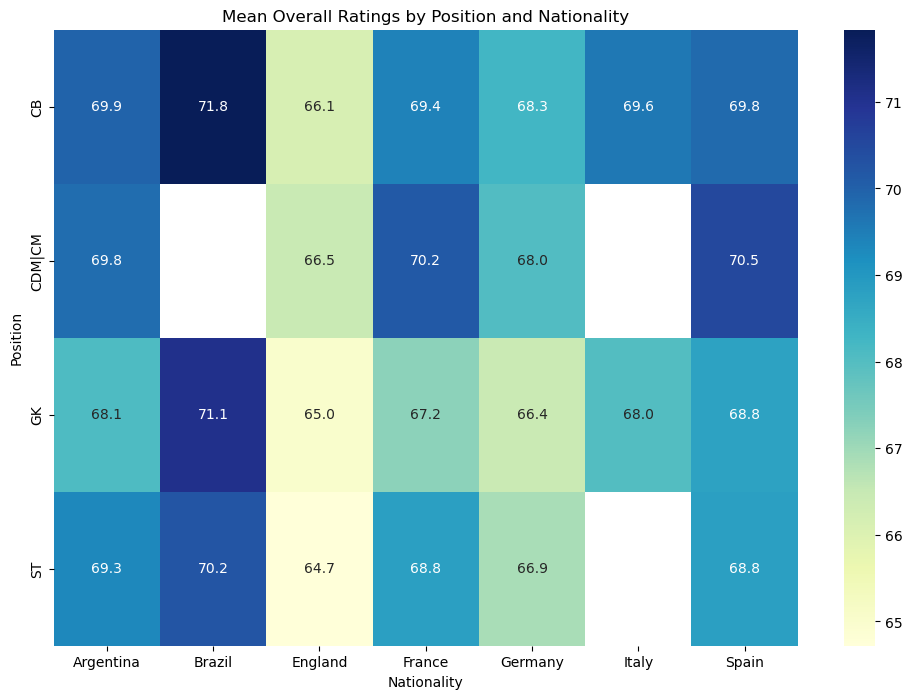

In [52]:
# Extracting the top 25 combinations
top_25_combinations = position_nationality_group[:25]

# Reshaping the data for the heatmap
heatmap_data = top_25_combinations.pivot(index="position", columns="nationality", values="mean")

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Mean Overall Ratings by Position and Nationality")
plt.xlabel("Nationality")
plt.ylabel("Position")
plt.show()

The heatmap visualizes the mean overall ratings for the top 25 combinations of positions and nationalities. Darker colors indicate higher ratings. From the heatmap, you can quickly identify which combinations tend to have higher ratings, helping you understand the positions and nationalities that produce high-rated players.

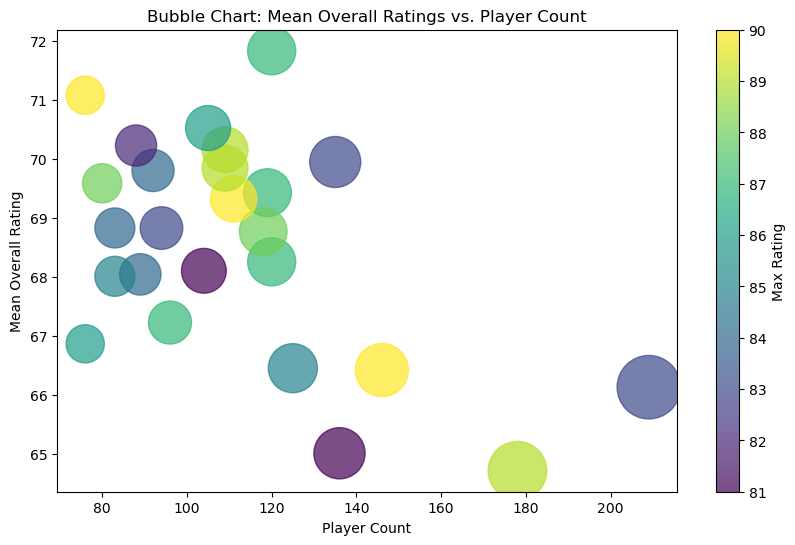

In [53]:
# Creating a bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    top_25_combinations["count"],
    top_25_combinations["mean"],
    s=top_25_combinations["count"] * 10,
    c=top_25_combinations["max"],
    cmap="viridis",
    alpha=0.7,
)
plt.colorbar(label="Max Rating")
plt.title("Bubble Chart: Mean Overall Ratings vs. Player Count")
plt.xlabel("Player Count")
plt.ylabel("Mean Overall Rating")
plt.show()

The bubble chart displays the relationship between mean overall ratings, player count, and maximum ratings for the top 25 combinations. Each bubble represents a combination, where the size of the bubble indicates the player count, and the color indicates the maximum rating. The chart helps you identify patterns and correlations between player count, mean rating, and maximum rating for each combination.

---------------------------------------------------------